# Clase 01 - Introducción a matplotlib

Profesor: **Daniel Opitz**, dopitz@udd.cl

 Este notebook servirá de introducción al uso de [matplotlib](https://matplotlib.org) y [pandas](https://pandas.pydata.org) para el análisis y visualización de datos. Matplotlib es una librería de visualización de datos en Python que ofrece una amplia gama de gráficos y herramientas de trazado para crear visualizaciones estáticas, animadas e interactivas. Es una de las librerías de visualización más populares y ampliamente utilizadas en la comunidad de Python, y es especialmente útil para aquellos que trabajan en análisis de datos, ciencia de datos y campos relacionados.

## Partes de una figura de matplotlib

Para comenzar, nos familiaricemos con los distintos elementos que componen una figura en `matplotlib`. Es bueno hacer la diferencia entre `figure`, `axes`, y `axis`, ya que esto nos permitirá más adelante manejarlos y personalizarlos a nuestro gusto.

La antigua versión de `matplotlib` usaba esta figura para hacer visualizar los diferentes componentes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from IPython.display import Image

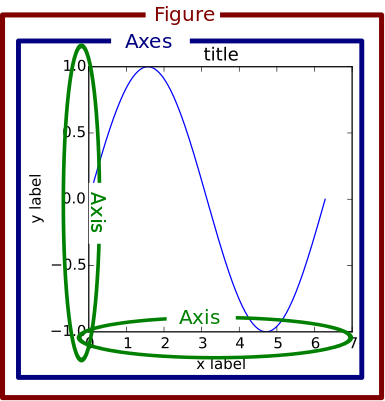

In [3]:
Image("/content/drive/MyDrive/udd/cursos/visualizacion/clases_practicas/images/fig_map.png")

La [nueva documentación](https://matplotlib.org/stable/gallery/showcase/anatomy.html) incluye una figura un poco más ilustrativa, además de los comandos para acceder a cada una de las componentes. Esto nos permitirá modificarlas asta el último detalle.

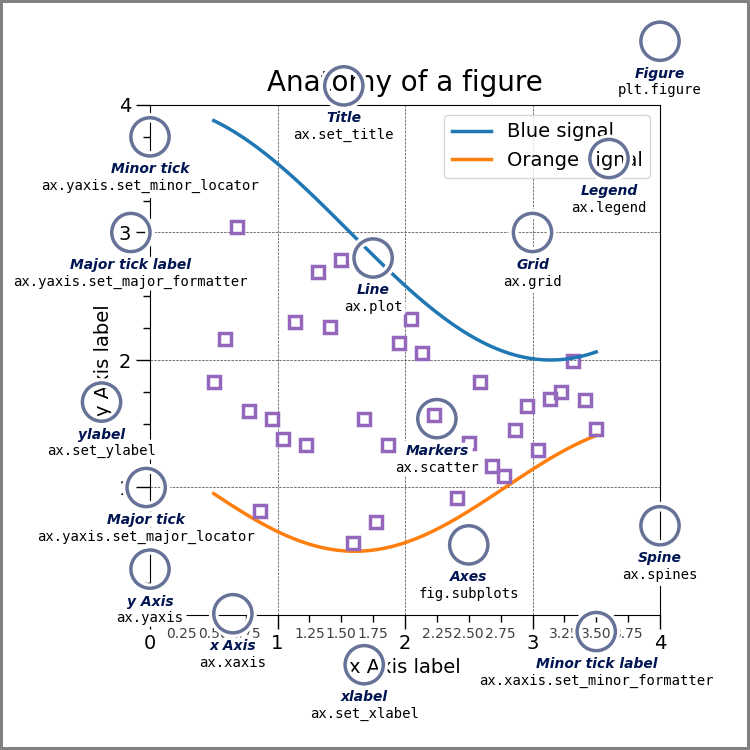

In [4]:
Image("/content/drive/MyDrive/udd/cursos/visualizacion/clases_practicas/images/sphx_glr_anatomy_001.png")

## Gráfico de líneas

Comenzaremos haciendo uno de los gráficos más comunes: el gráfico de líneas. Para eso, importaremos `matplotlib` y `numpy`, lo cual nos permitirá crear datos y graficarlos

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# crea imagenes de alta resolución
%config InlineBackend.figure_format = "retina"

# numpy es una biblioteca de bajo nivel, sobre la que construye pandas.
# la utilizaremos en esta sección para generar datos de prueba.
import numpy as np

Creamos los arreglos `x` e `y` que usaremos para nuestra demostración. El `y` será simplemente la función coseno de `x`, variable que va desde -5 a 5.

In [6]:
x = np.linspace(-5, 5, num=50)
y = np.cos(x)

In [7]:
x

array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

La forma más fácil de usar `matplolib` es usando directamente el método `plot`

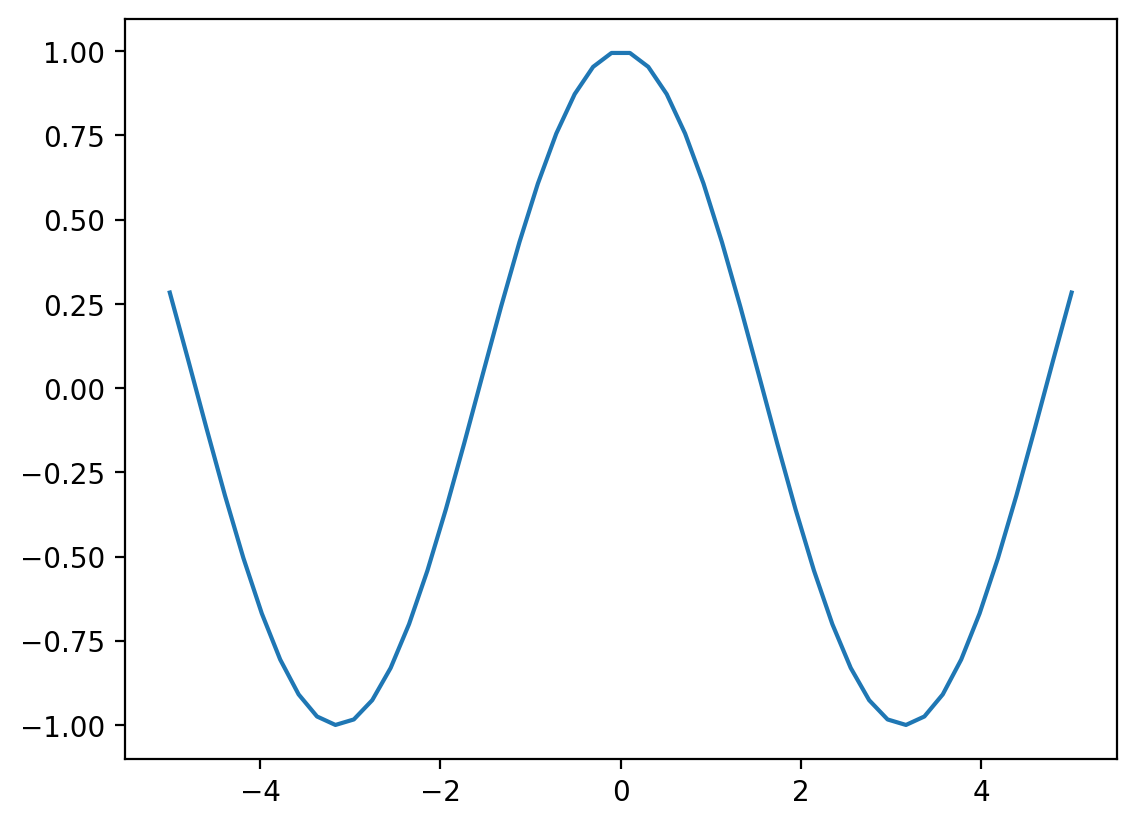

In [8]:
plt.plot(x, y, label='coseno')

De la misma forma, podemos añadirle un título, los nombres de los ejes y una leyenda a la figura.

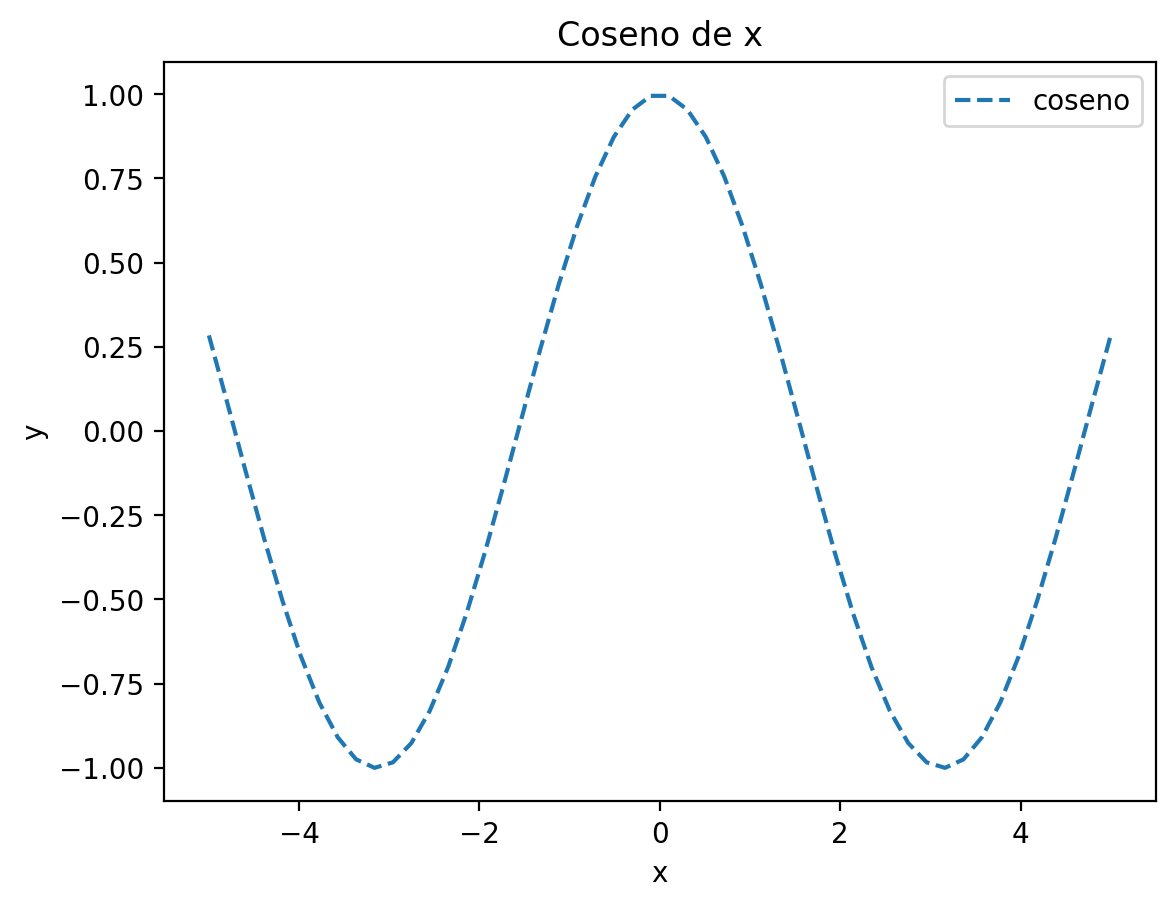

In [9]:
plt.plot(x, y, '--', label='coseno')

plt.title('Coseno de x')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

A pesar de que esa es la forma más fácil de graficar los datos, nosotros queremos tener un mayor control sobre cada componente del gráfico, por lo que es mejor definir una `figure` y un `axes` que podamos manejar más adelante. Para eso ocuparemos `subplots`.

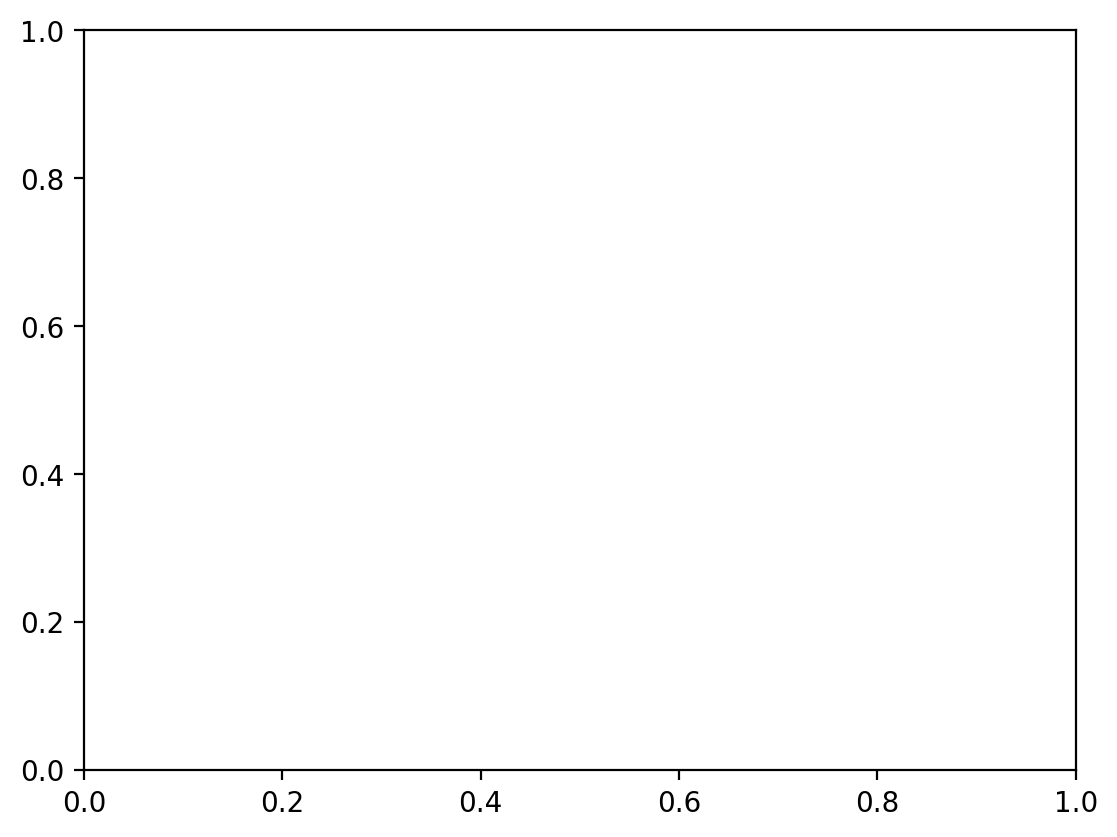

In [10]:
fig, ax = plt.subplots()

Ahora podemos graficar nuestros datos, ponerle un título al gráfico, el nombre a los ejes, y la leyenda. Ojo, que la notación ahora cambia un poco porque `plt` y `ax` **no tienen los mismos métodos**.

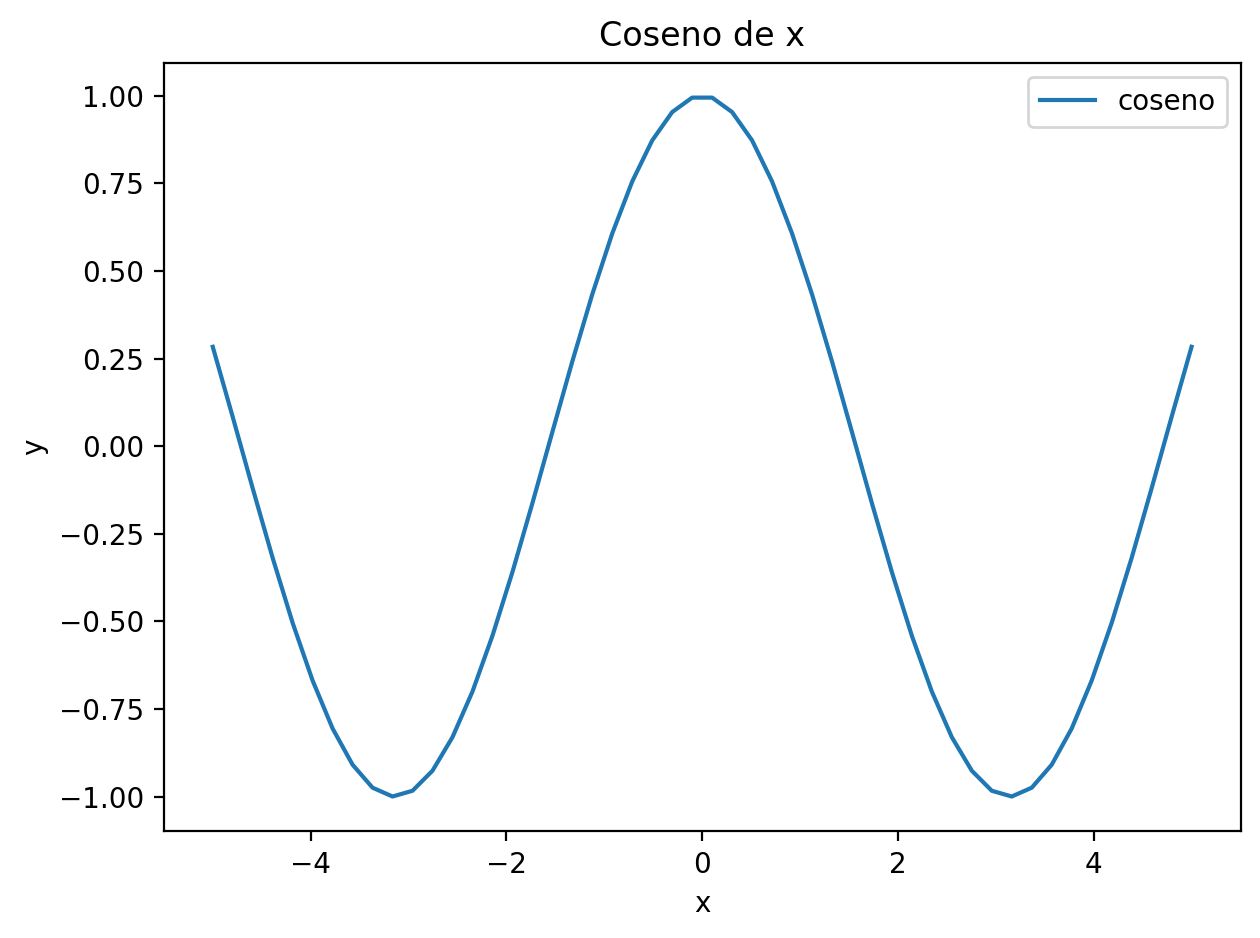

In [11]:
fig, ax = plt.subplots()

ax.plot(x, y, '-', label='coseno')
ax.set_title('Coseno de x')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

fig.tight_layout()

Así vamos a ir agregando más cosas de a poco. Primero agregamos círculos para marcar cada dato.

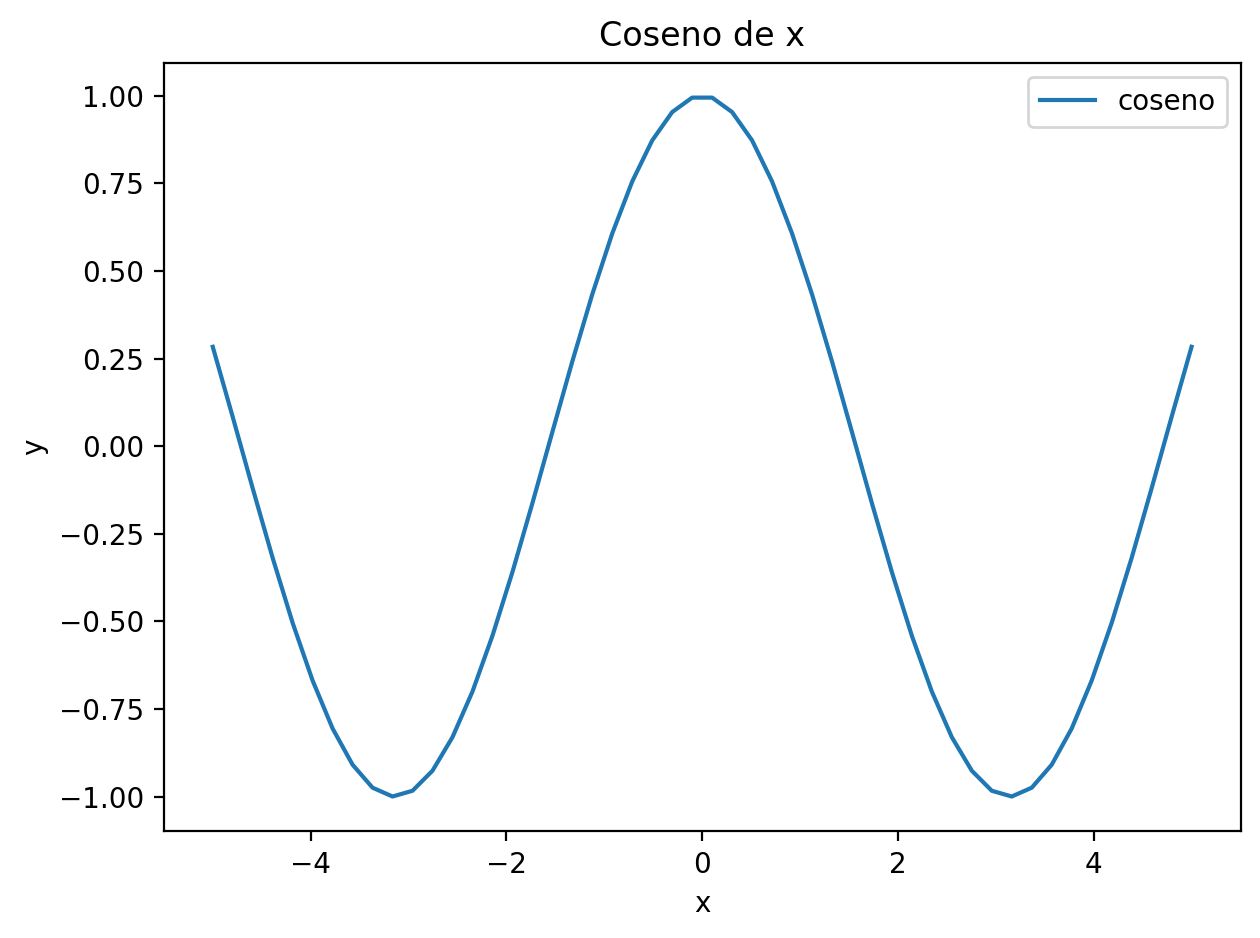

In [12]:
fig, ax = plt.subplots()

ax.plot(x, y, '-', label='coseno')
ax.set_title('Coseno de x')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

fig.tight_layout()

Ahora pobramos con colores distintos.

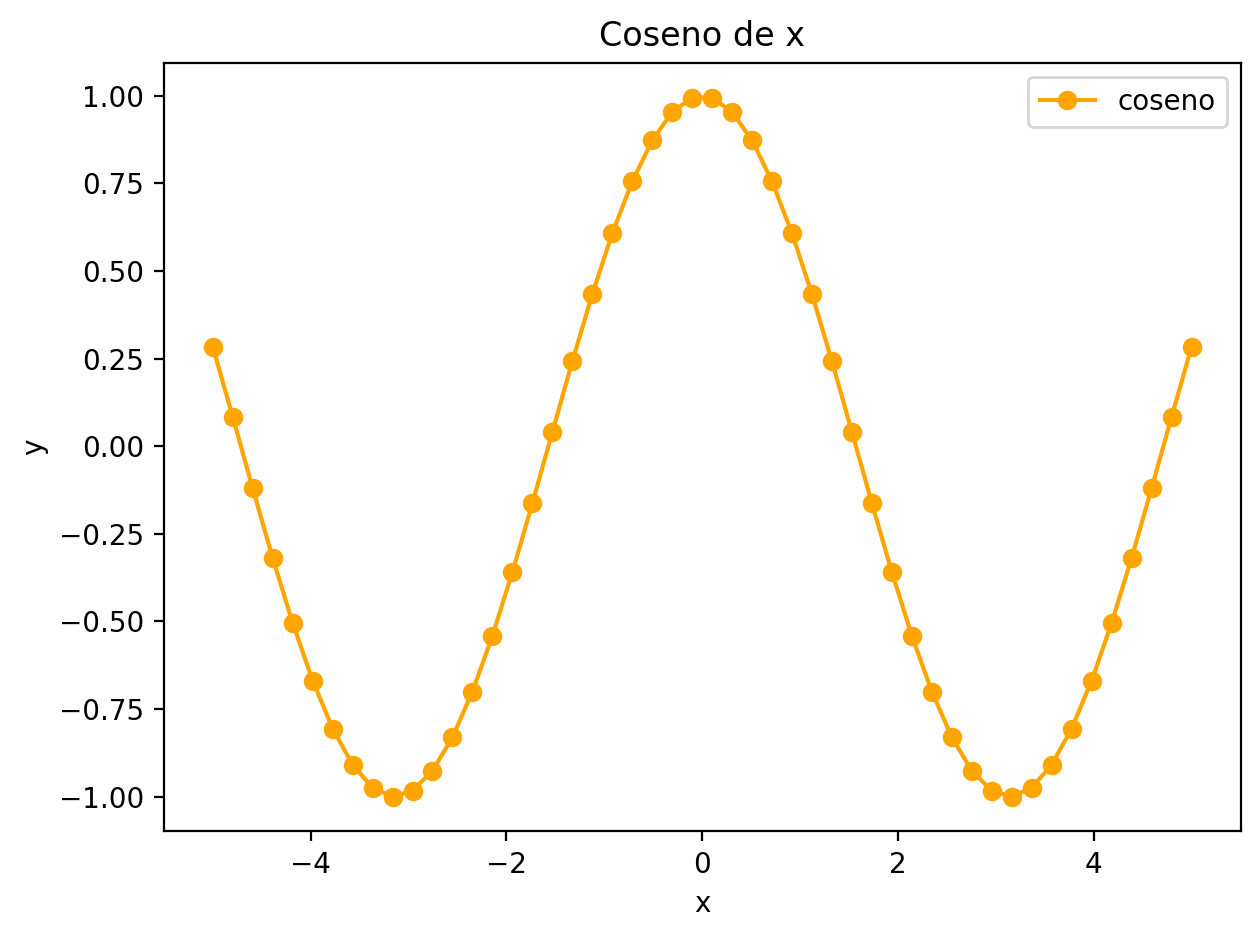

In [13]:
fig, ax = plt.subplots()

ax.plot(x, y, 'o-', color='orange', label='coseno')
ax.set_title('Coseno de x')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

fig.tight_layout()

Ahora añadimos una segunda curva al mismo gráfico, para lo cual definimos la variable `z` como el seno de x. Posteriormente la graficamos usando un color de línea y un símbolo distinto al ya usado por la función coseno. En este caso hay que tener cuidado con el nombre del gráfico porque la función ya no corresponder solamente al coseno de x.

In [14]:
z = np.sin(x)

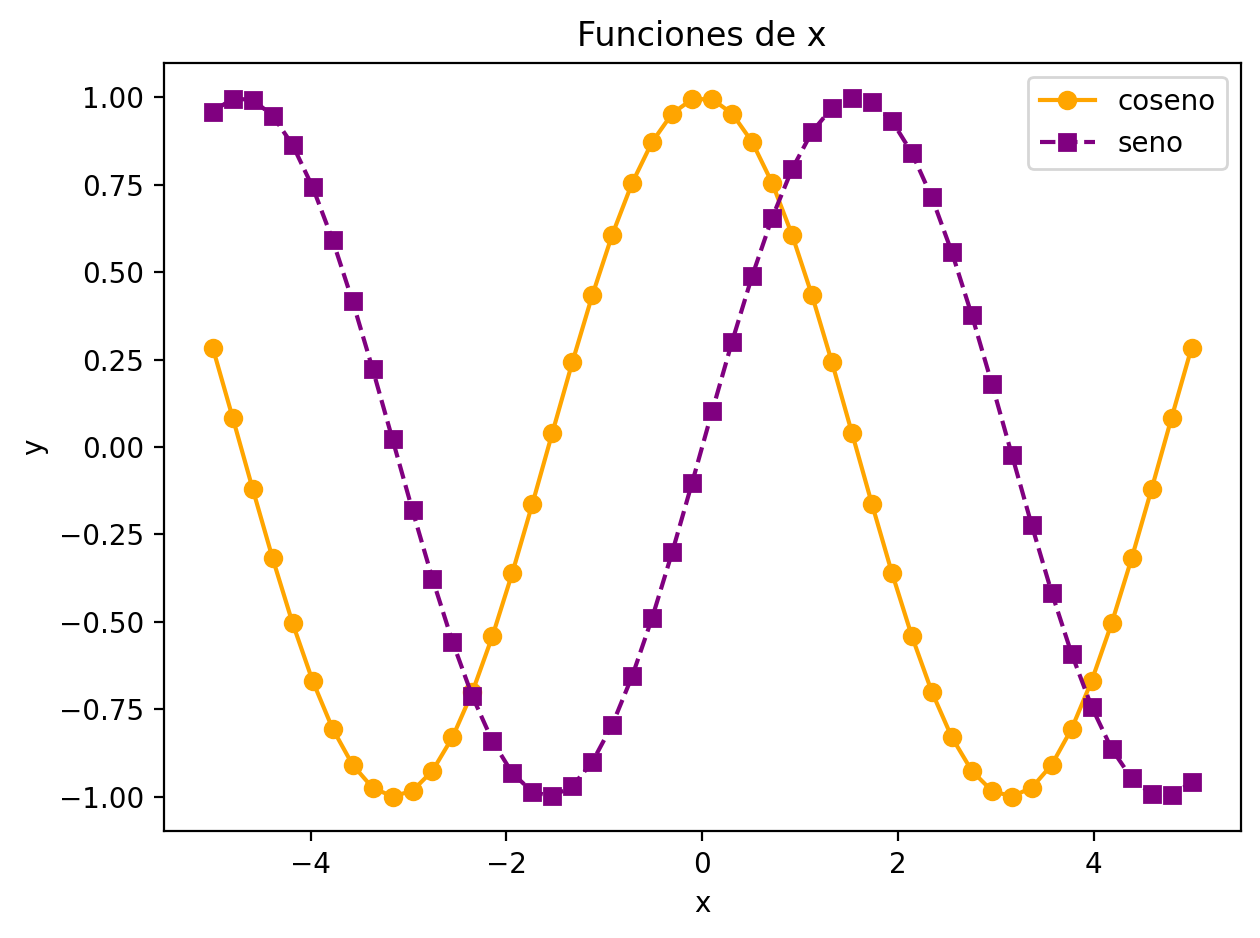

In [15]:
fig, ax = plt.subplots()

ax.plot(x, y, 'o-', color='orange', label='coseno')
ax.plot(x, z, 's--', color='purple', label='seno')
ax.set_title('Funciones de x')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

fig.tight_layout()

La ventaja del `subplots` es que nos permite definiar más de un `axes`, o dicho de otra forma, una grilla de gráficos. Pueden ser tanto horizontal como verticalmente, dependiendo de los parámetros que le demos.

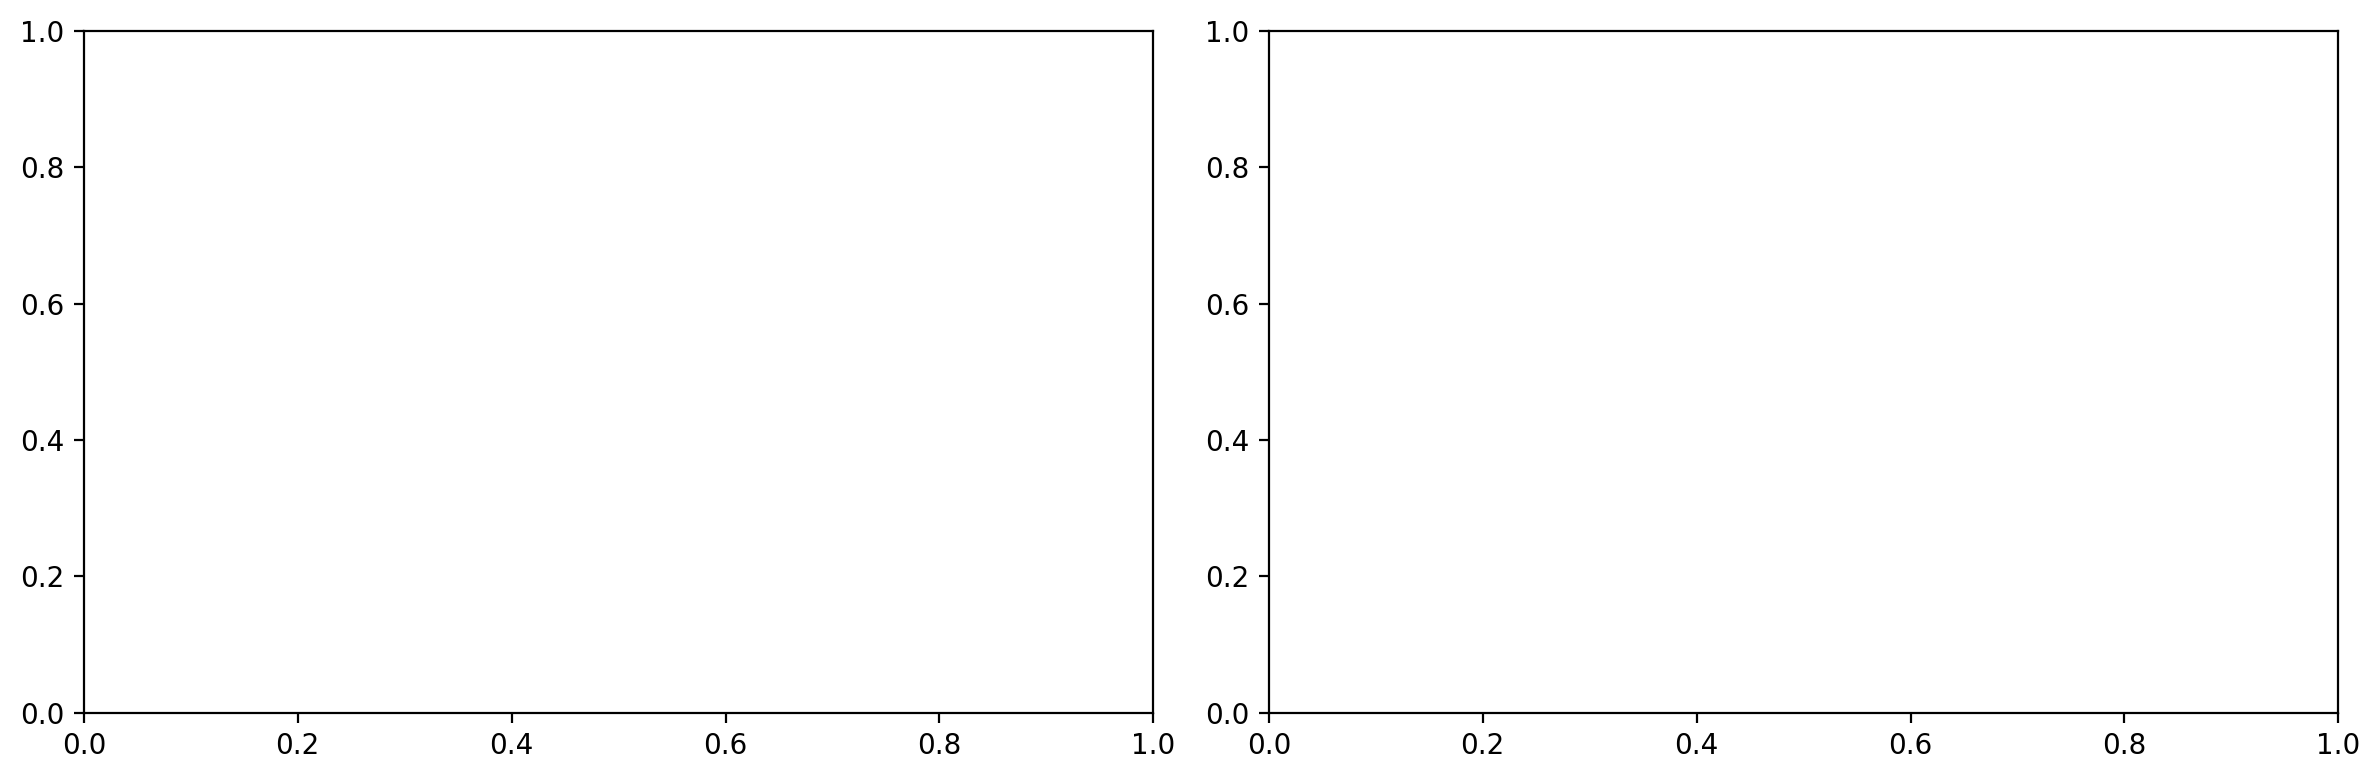

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

fig.tight_layout()

Ahora podemos graficar cada curva en uno de esos `axes` para separarlas.

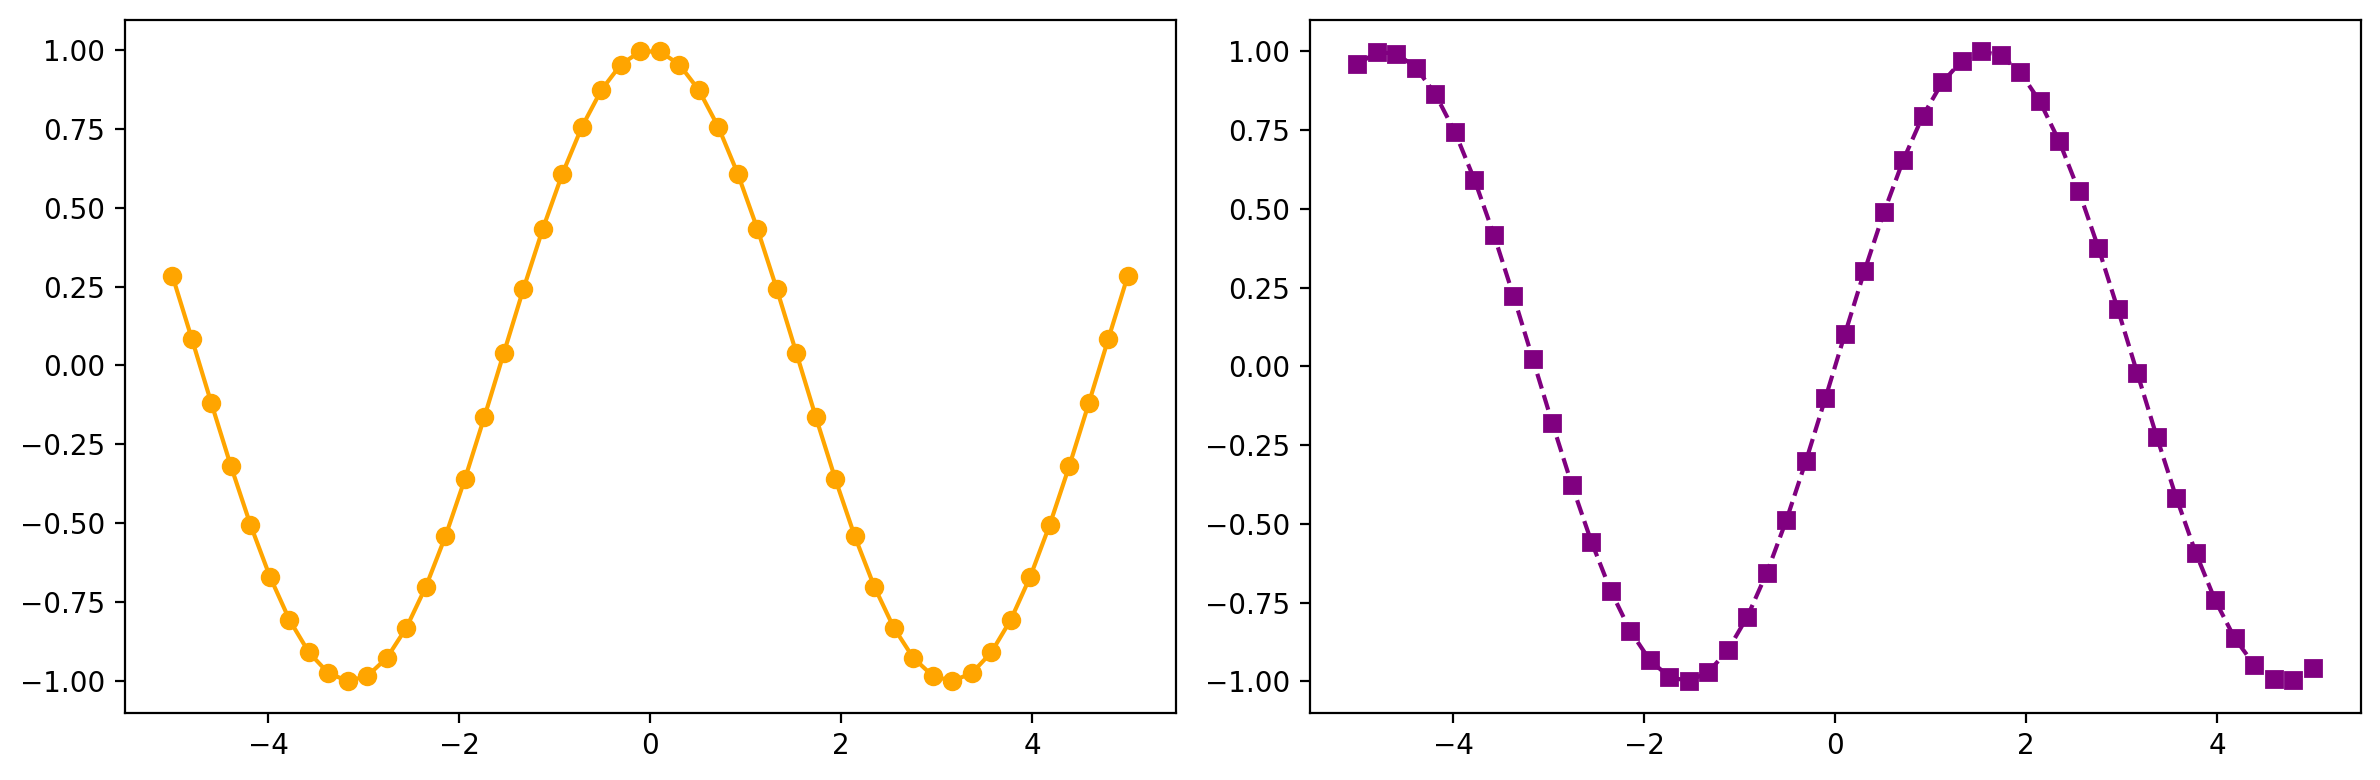

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x, y, 'o-', color='orange', label='coseno')
ax[1].plot(x, z, 's--', color='purple', label='seno')

fig.tight_layout()

Y podemos agregar el título y el nombre de los ejes por separado a cada `axes`

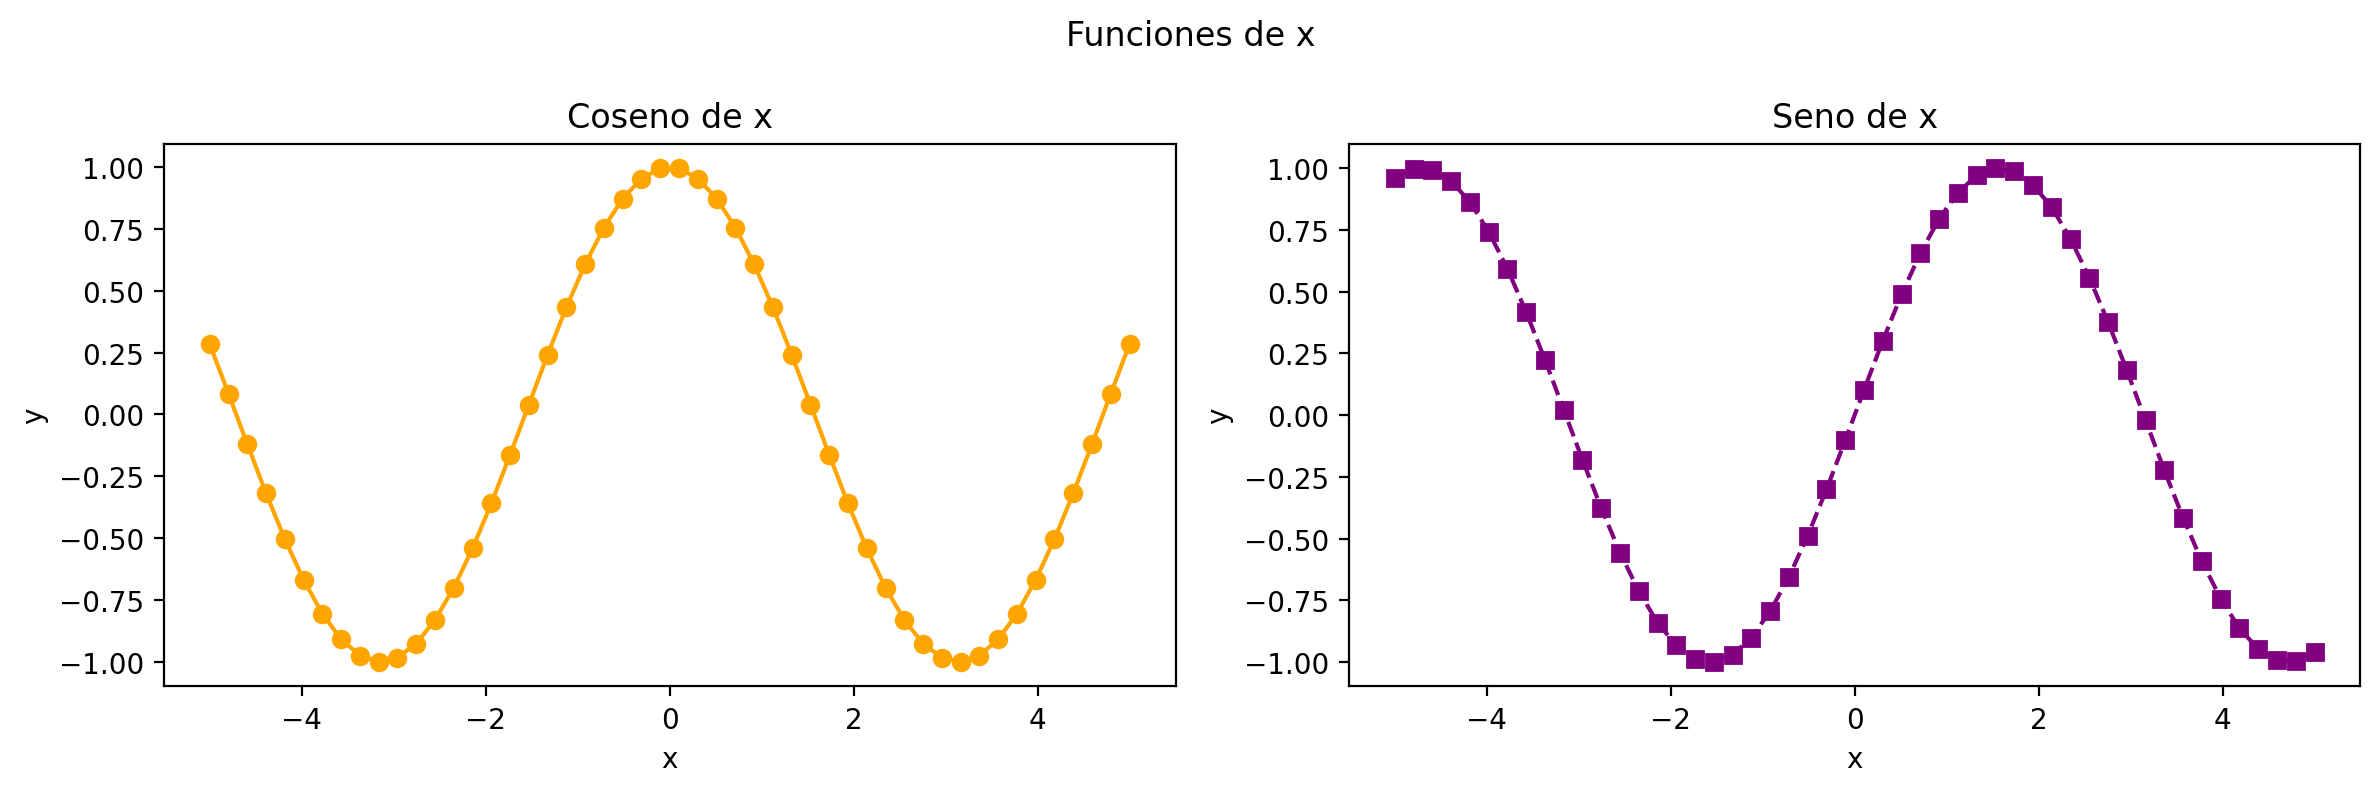

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x, y, 'o-', color='orange', label='coseno')
ax[0].set_title('Coseno de x')
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[1].plot(x, z, 's--', color='purple', label='seno')
ax[1].set_title('Seno de x')
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")

fig.suptitle('Funciones de x')

fig.tight_layout()

Con eso ya terminamos nuestro primer gráfico de líneas. (Que en verdad fueron dos gráficos de líneas.) Ahora pasamos al siguiente tipo de gráfico: el de dispersión.

## Gráfico de dispersión con datos de Gapminder

# Dispersión o Scatterplot

Para este ejercicio ocuparemos los datos de Gapminder, que muestran el PBI per cápita y la expectativa de vida para cada país, además de la población y del continente al cual pertenecen. Para cargar estos datos usaremos `pandas` y comenzaremos a trabajar con dataframes.

In [19]:
import pandas as pd

In [20]:
try:
    import google.colab
    !curl -O 'https://raw.githubusercontent.com/daniopitz/visualizacion/main/clases_practicas/data/rosling.csv'
except:
    pass

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7019  100  7019    0     0  23108      0 --:--:-- --:--:-- --:--:-- 23088


In [21]:
df_scatter = pd.read_csv("rosling.csv")
df_scatter.head()

Country  GDP per capita  Life expectancy  Population  \
0                   Lesotho            2598             47.1     2174645   
1  Central African Republic             599             49.6     4546100   
2                 Swaziland            6095             51.8     1319011   
3               Afghanistan            1925             53.8    33736494   
4                   Somalia             624             54.2    13908129   

  Continent  
0    Africa  
1    Africa  
2    Africa  
3      Asia  
4    Africa

Definimos las variables `x` e `y` que usaremos para el gráfico.

In [22]:
xlabel = 'GDP per capita'
ylabel = 'Life expectancy'

Por ahora, siguiendo la lógica del gráfico de línea, usaremos `ax.scatter` para el gráfico de dispersión.

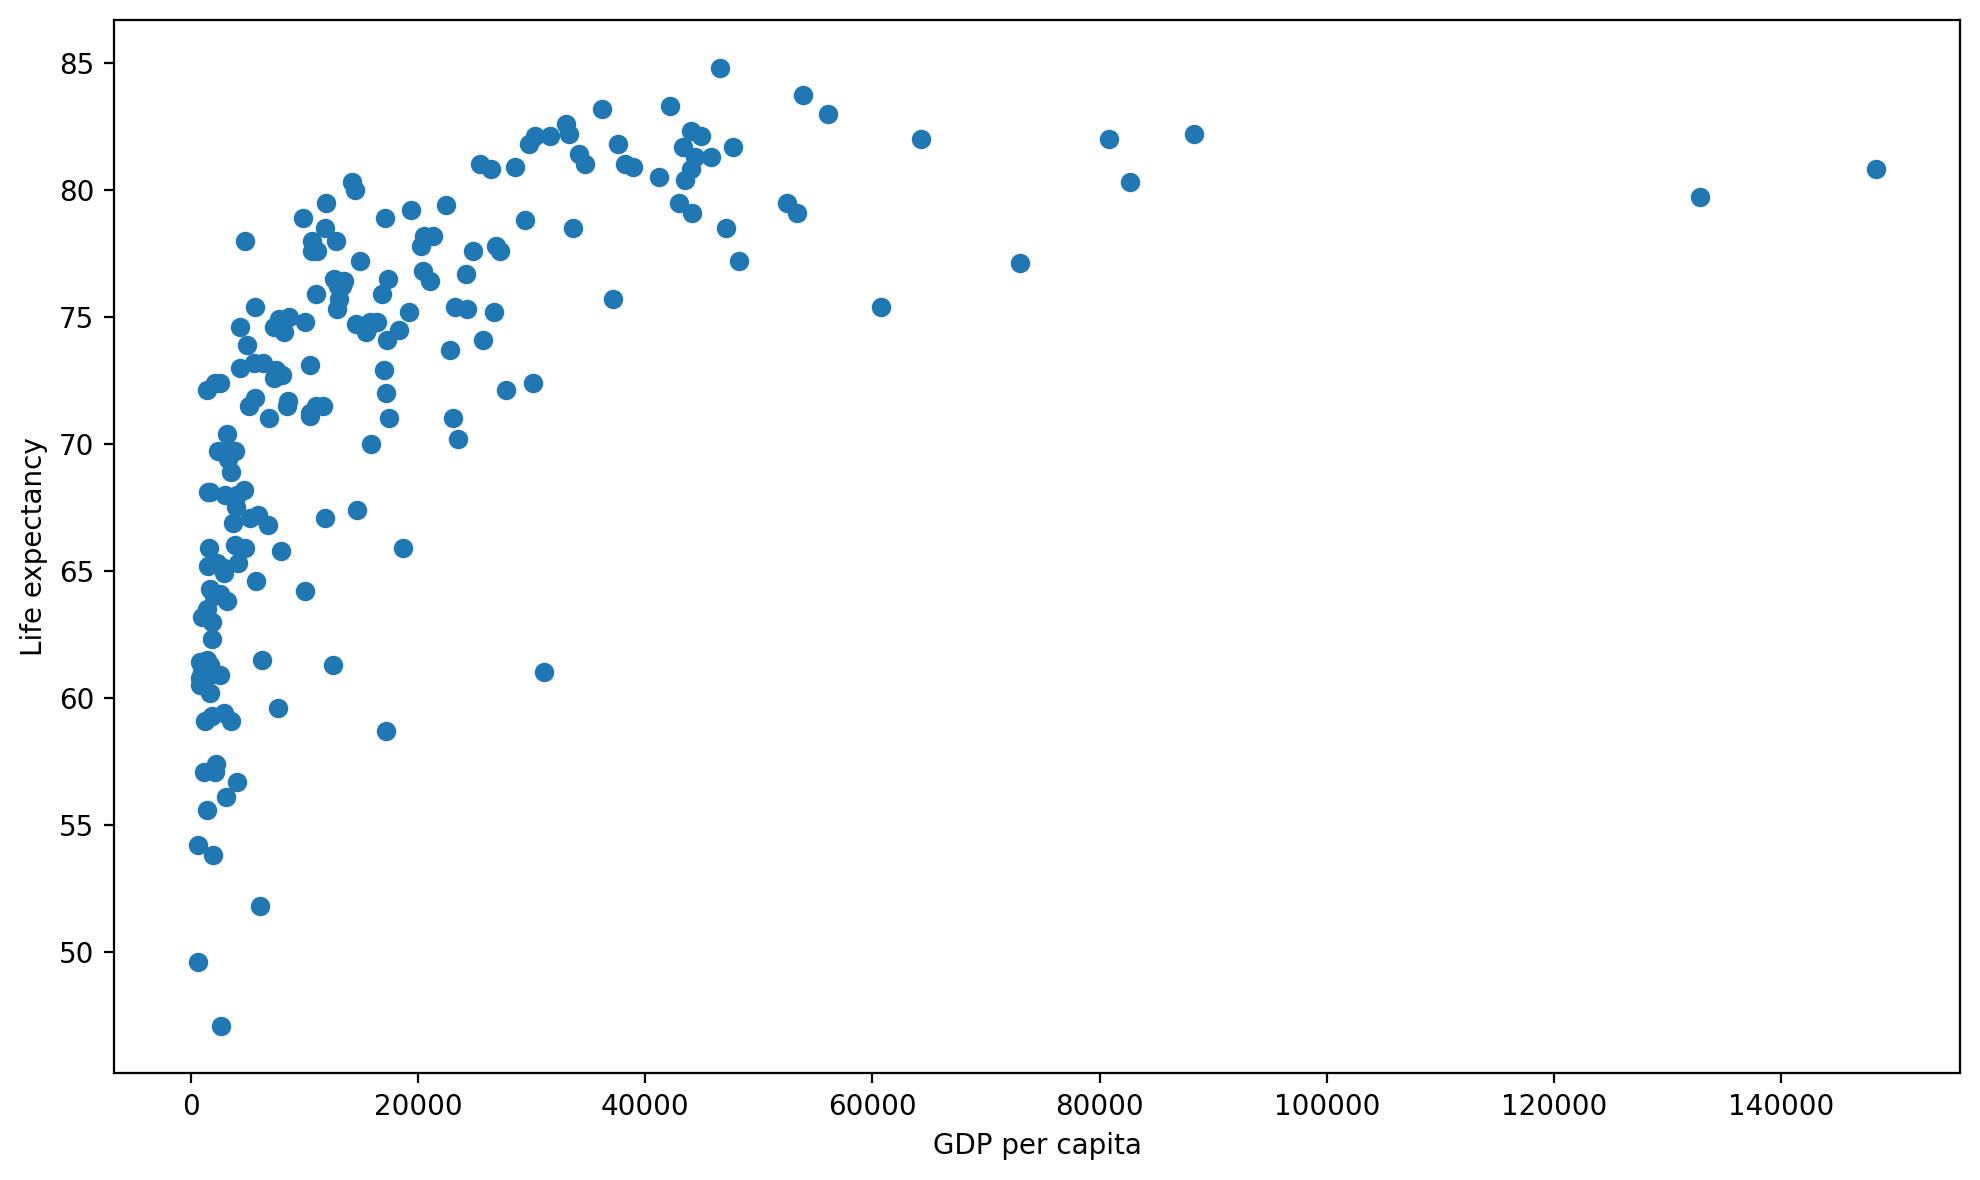

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

# Bubble Plot

Ahora podemos usar la población de cada país como el radio de los círculos.

In [24]:
size = 'Population'

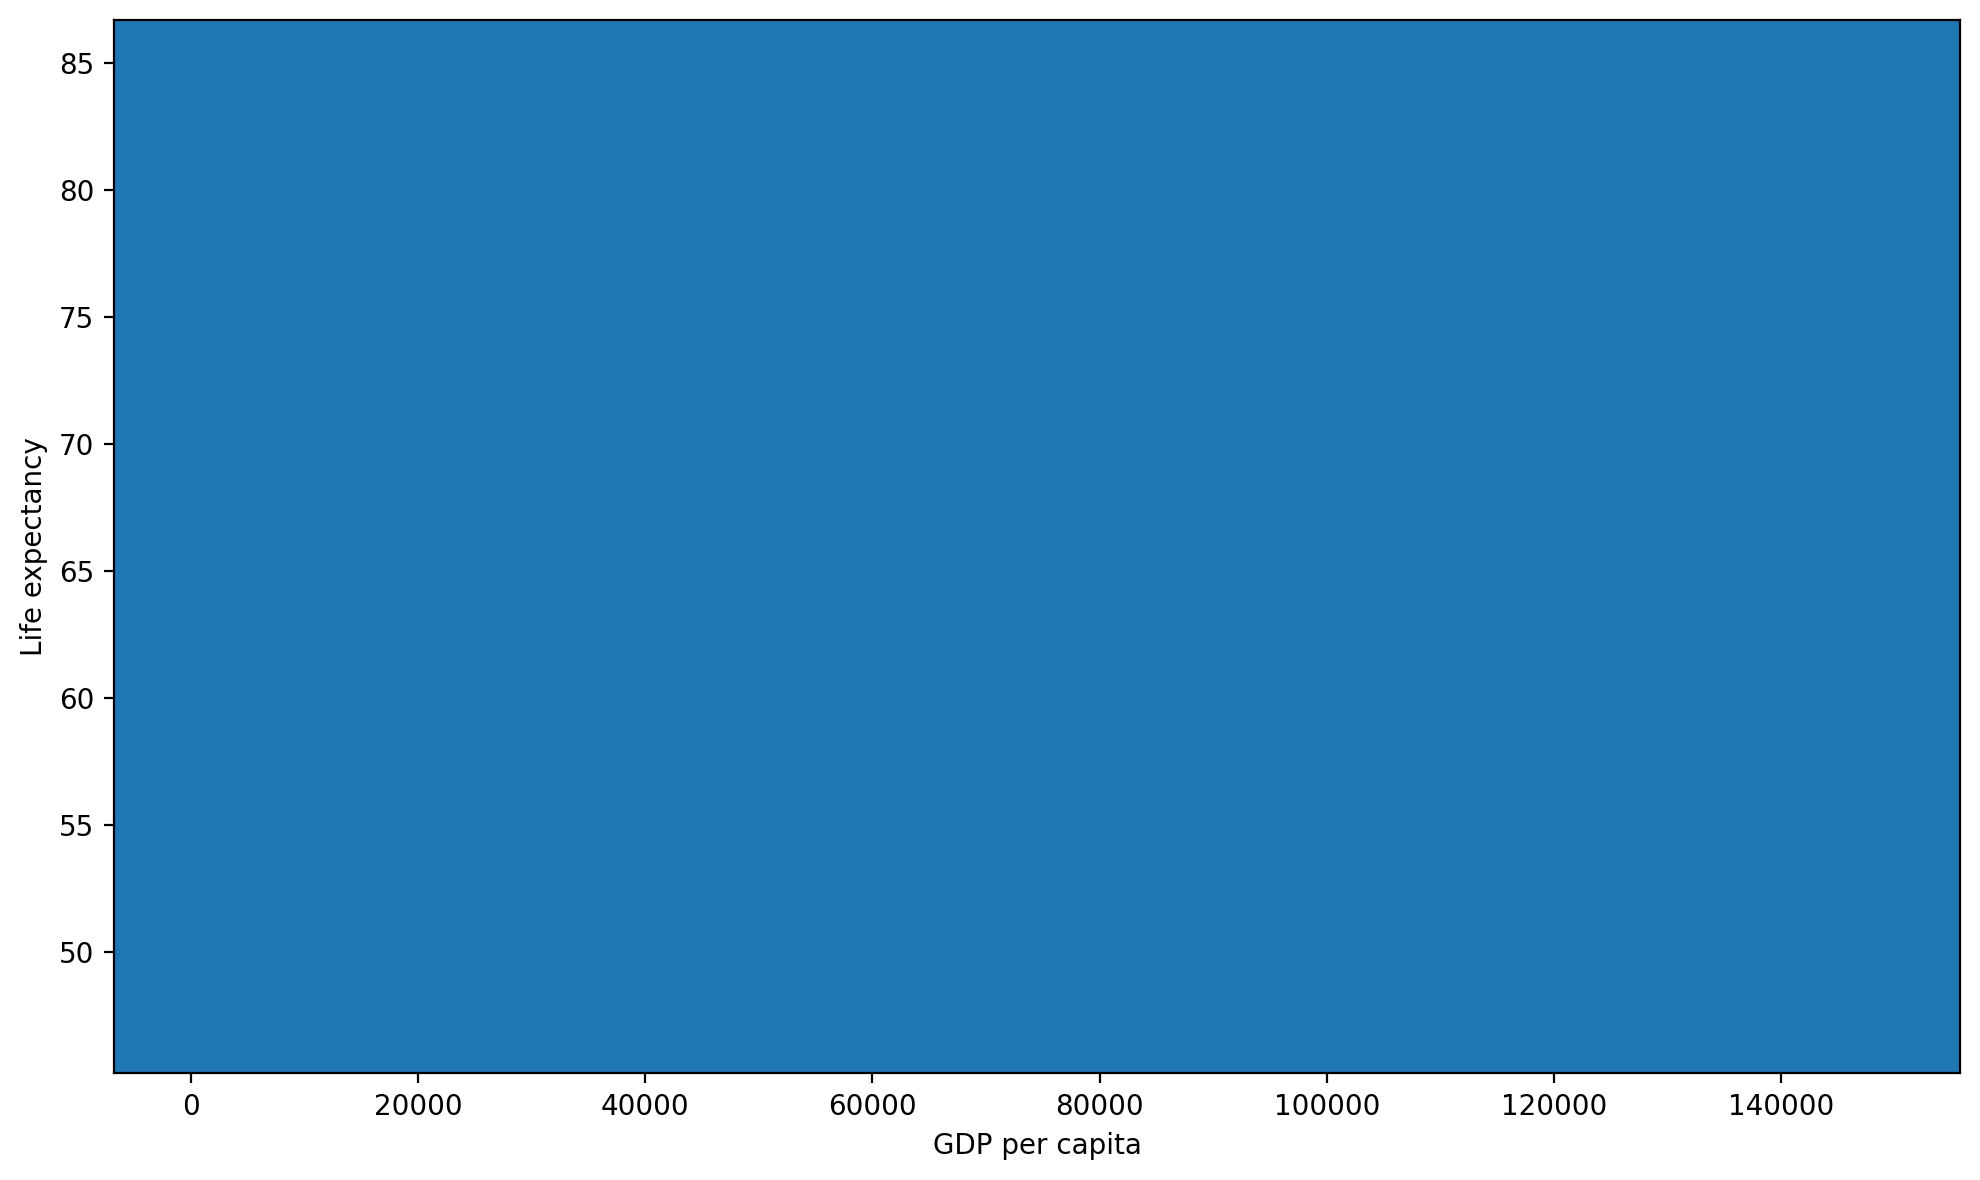

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel], s=df_scatter[size])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

Bueno, hay que normalizar la población a un valor que nos permita graficar, así que se necesitan unos cálculos extras.

In [26]:
max_population = df_scatter[size].max()
print(max_population)
df_scatter['size'] =  2000*df_scatter[size] / max_population

1371220000


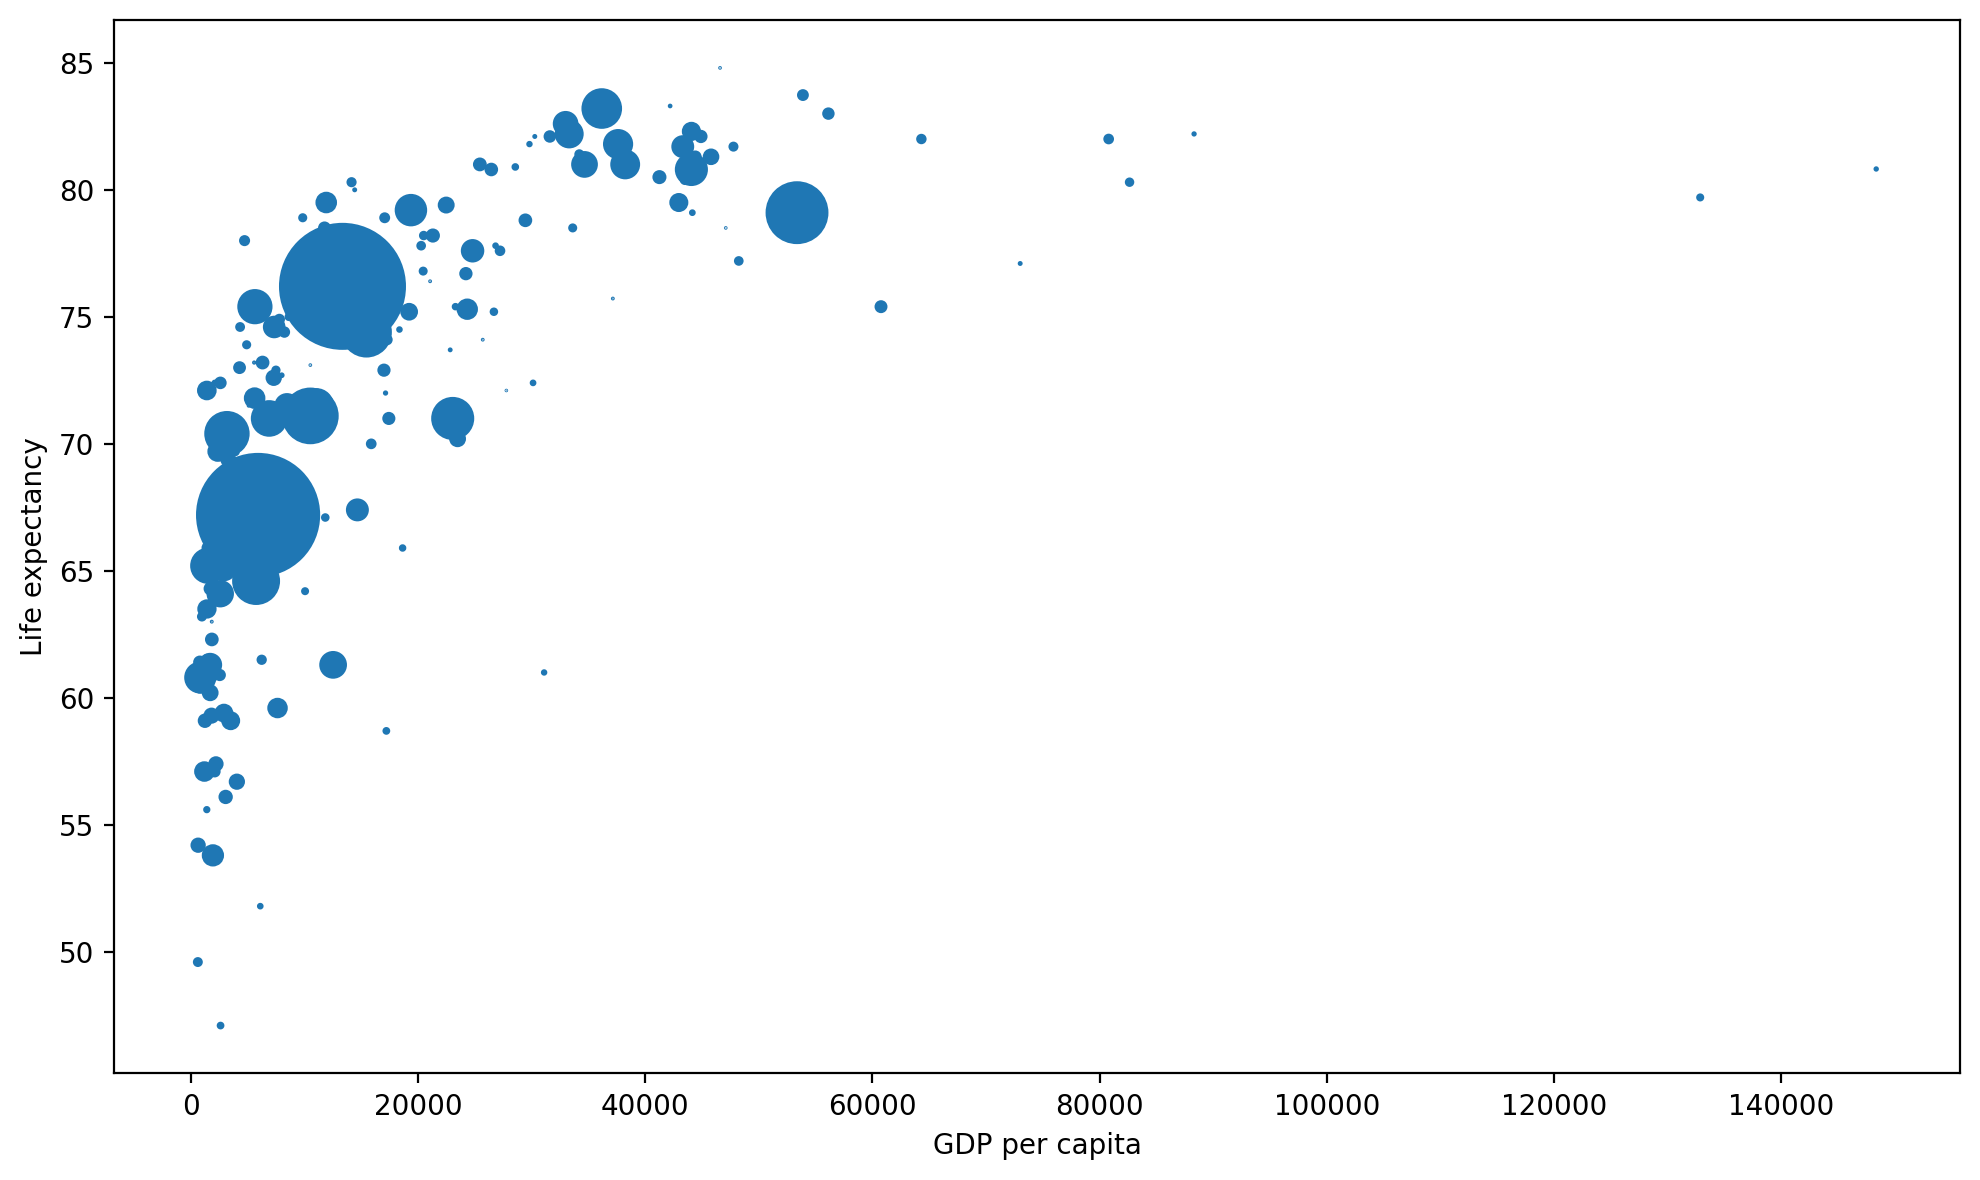

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel], s=df_scatter['size'])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

Ahora la idea es colorear cada círculo dependiendo del continente al cual pertenece. Para eso debemos definiar una nueva columna con el color de cada país y pasarla como argumento al `ax.scatter`

In [28]:
pd.unique(df_scatter['Continent'])

array(['Africa', 'Asia', 'Australia', 'North America', 'South America',
       'Europe'], dtype=object)

In [29]:
df_scatter['color'] = df_scatter['Continent'].map({
    'Africa': "#e41a1c",
    'Asia': "#377eb8",
    'Australia': "#4daf4a",
    'Europe':"#984ea3",
    'North America': "#ff7f00",
    'South America': "#a65628"
})

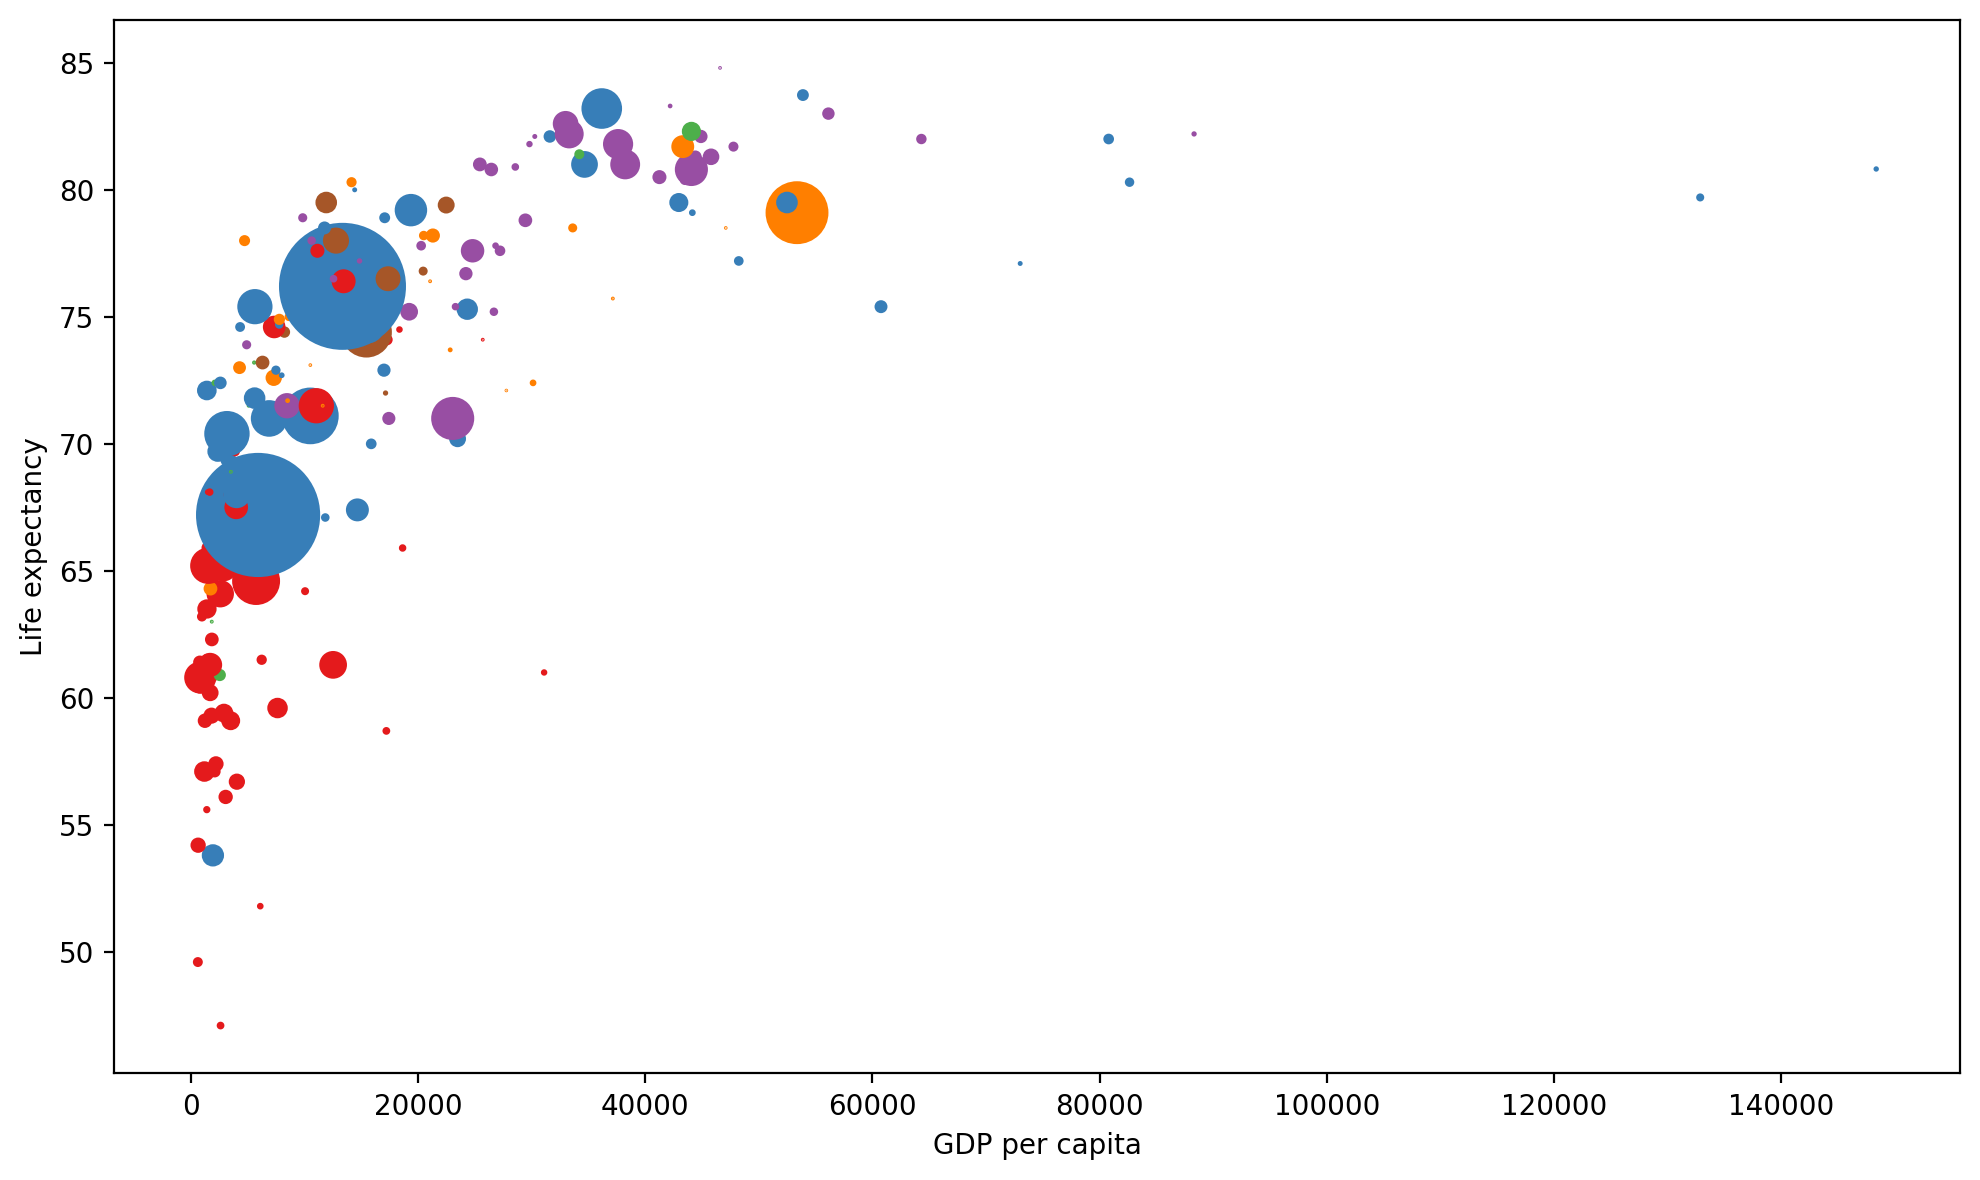

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel],
           s=df_scatter['size'],
           c=df_scatter['color'])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

Le bajaremos un poco la opacidad y agregaremos border blancos para que se puedan distinguir de mejor forma. Estos pequeños detalles son los que hacen la diferencia y nos llevan a crear las mejores visualizaciones.

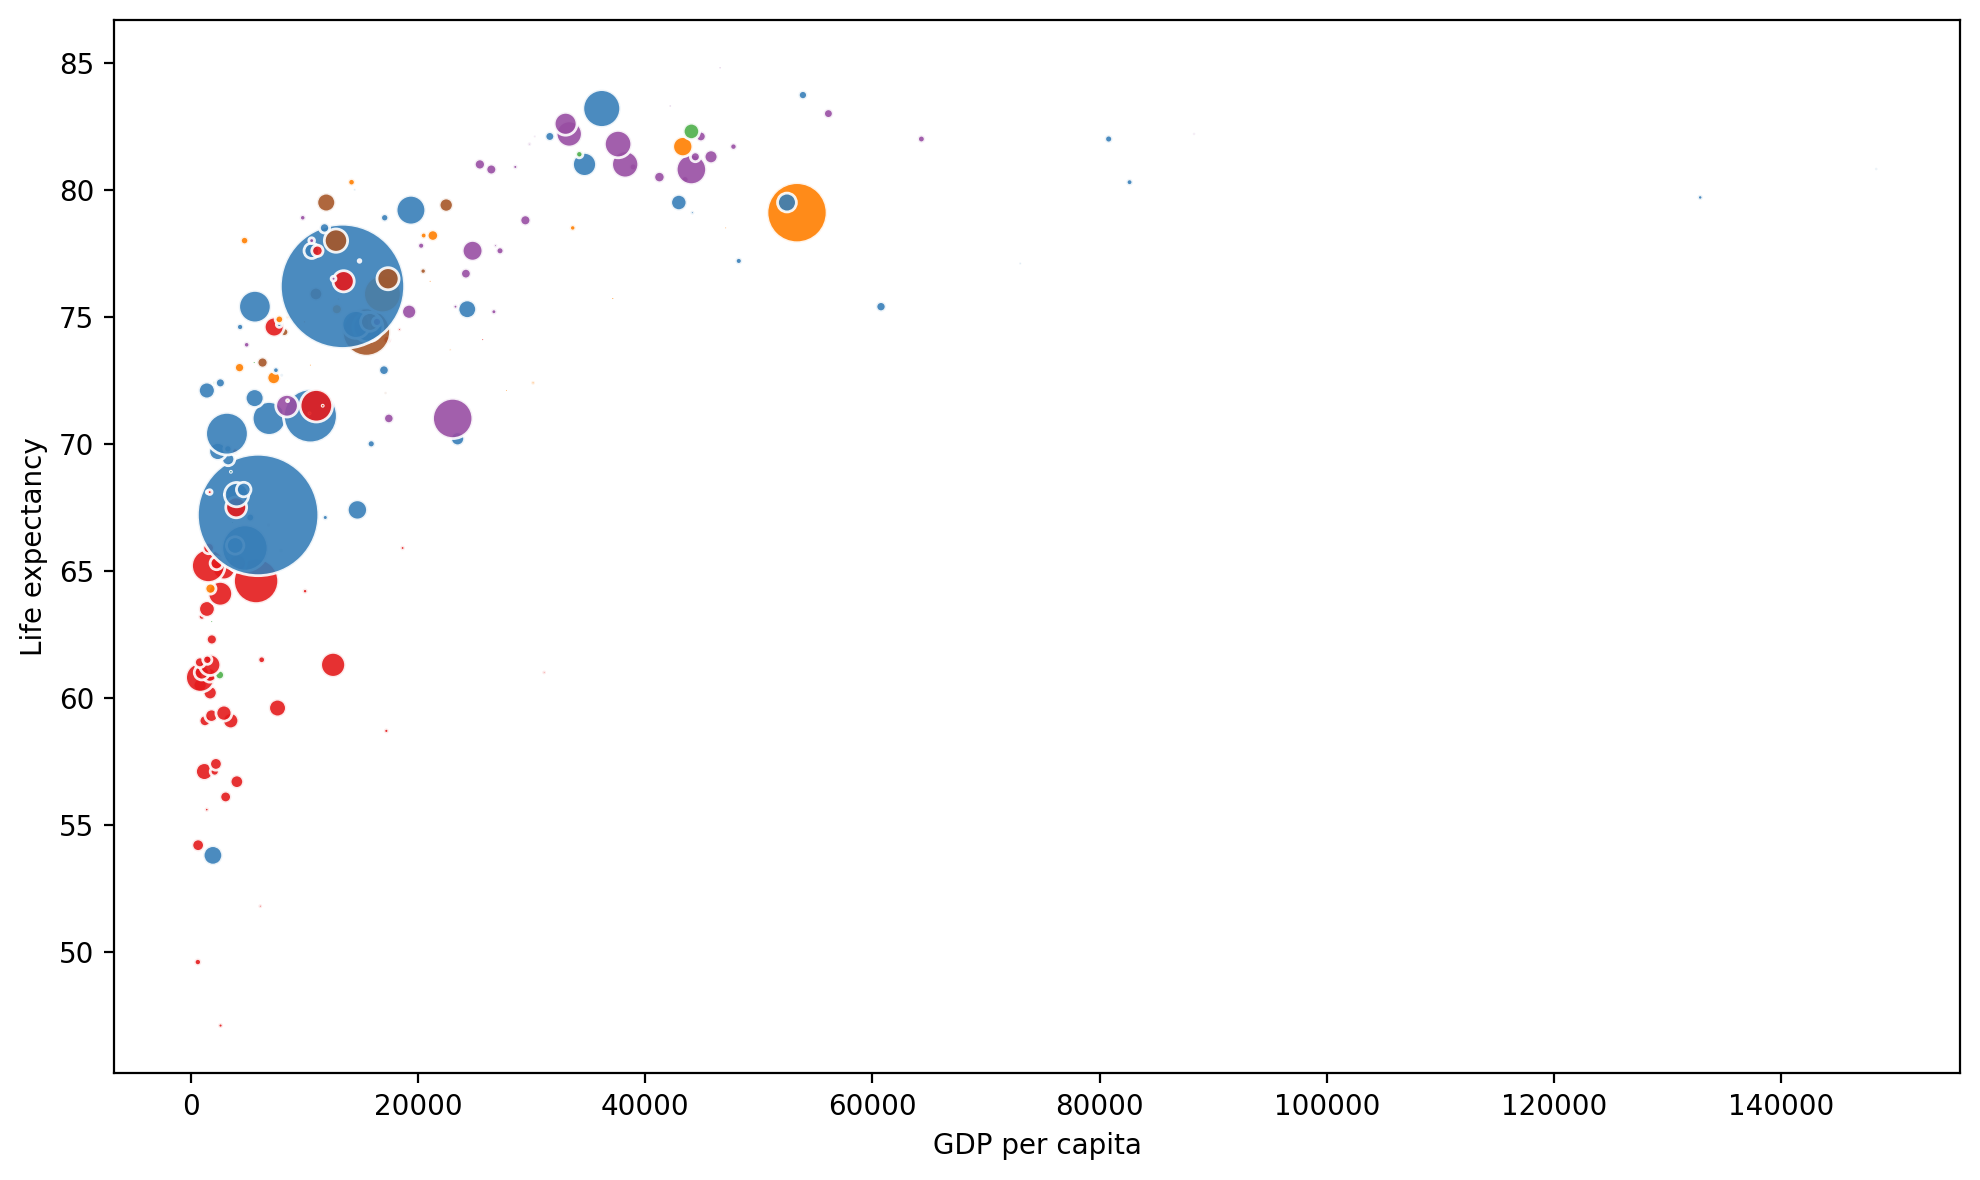

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel],
           s=df_scatter['size'],
           c=df_scatter['color'],
           alpha=0.9,
           edgecolors='white')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

fig.savefig('figure.png', dpi=100)

[<matplotlib.patches.Patch object at 0x7cb8240f6140>, <matplotlib.patches.Patch object at 0x7cb800f04d00>, <matplotlib.patches.Patch object at 0x7cb800fc93c0>, <matplotlib.patches.Patch object at 0x7cb800fc9e70>, <matplotlib.patches.Patch object at 0x7cb800fc8340>, <matplotlib.patches.Patch object at 0x7cb800fc9a20>]


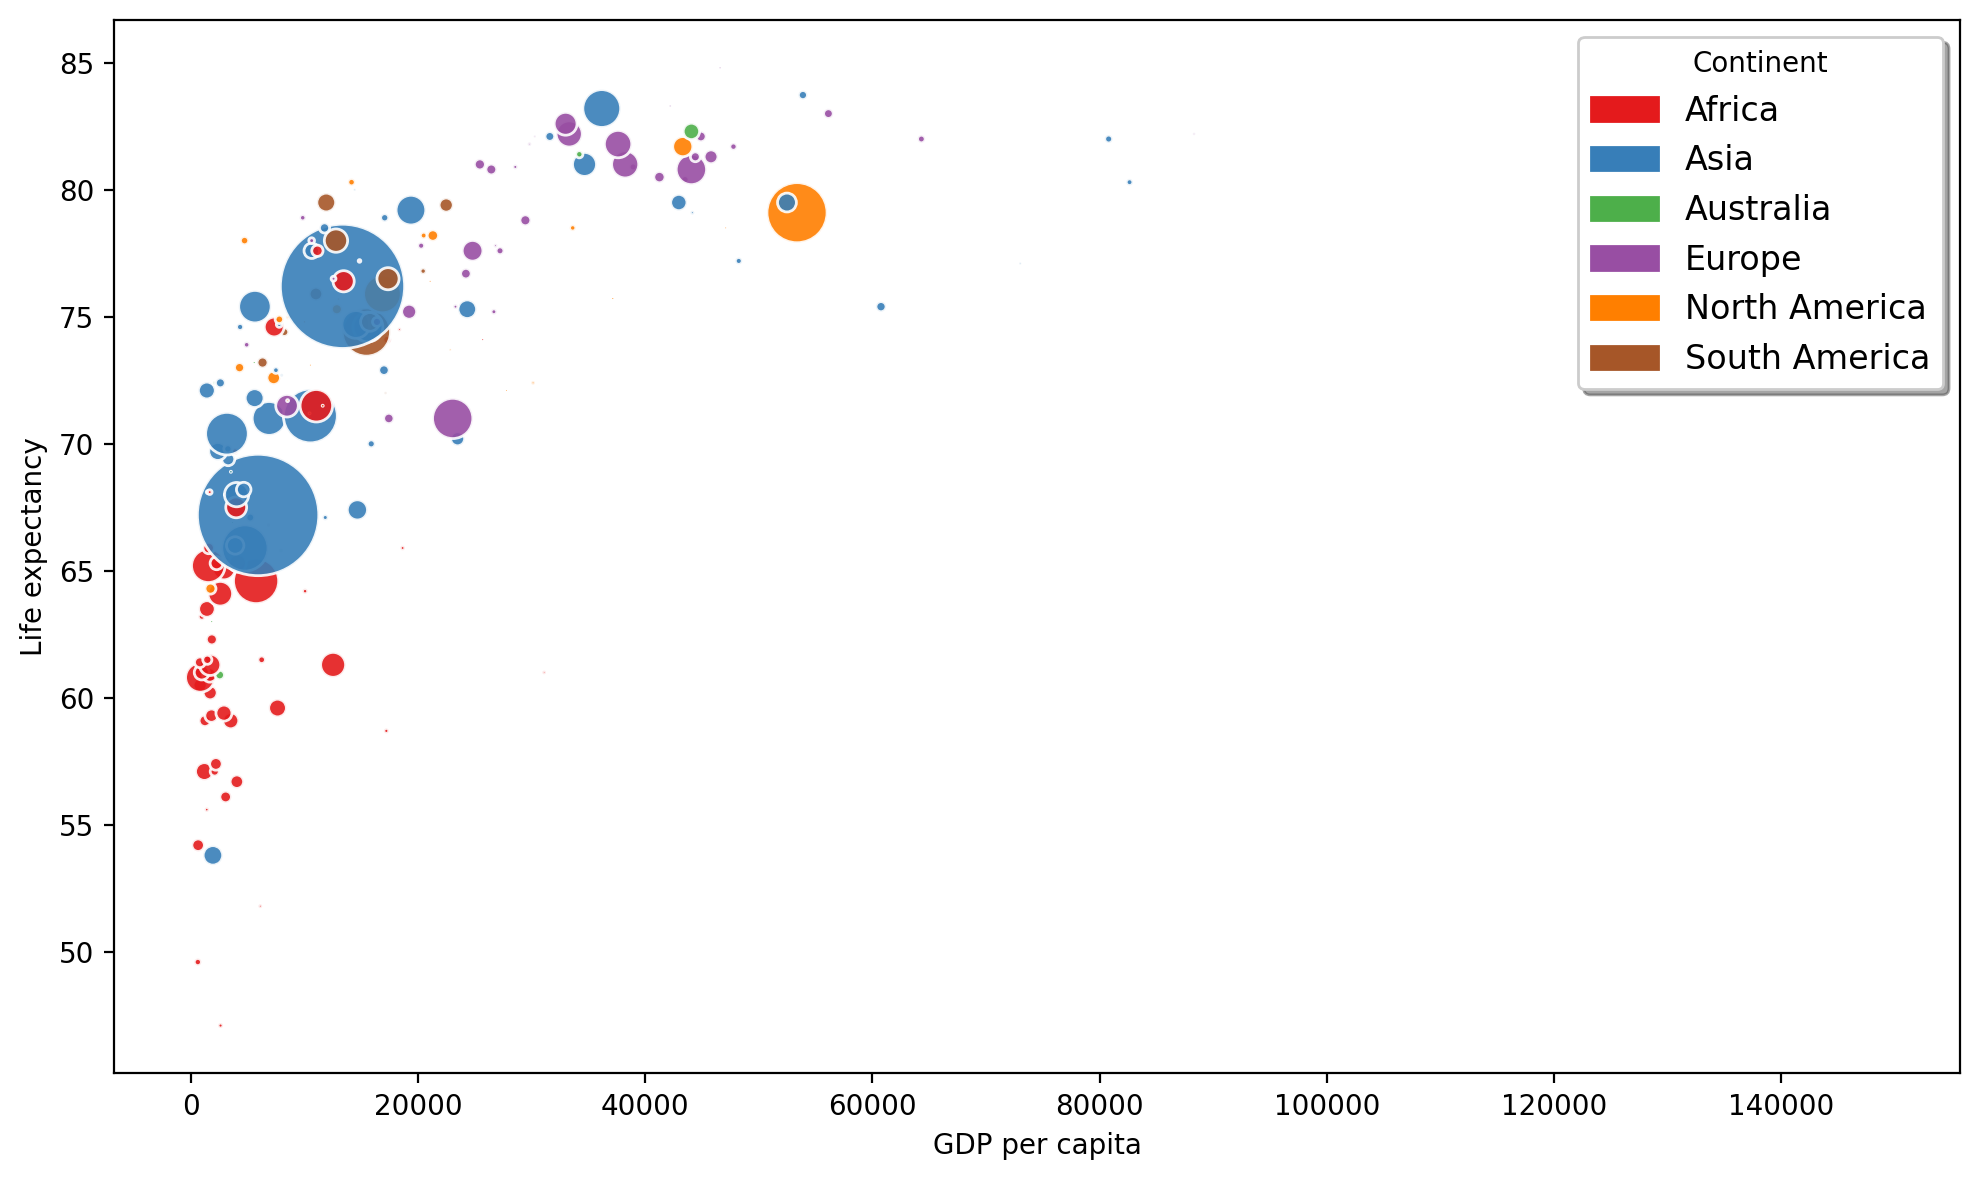

In [32]:

from matplotlib.patches import Patch

# Define el mapeo de colores
color_map = {
    'Africa': "#e41a1c",
    'Asia': "#377eb8",
    'Australia': "#4daf4a",
    'Europe':"#984ea3",
    'North America': "#ff7f00",
    'South America': "#a65628"
}

# Crea una lista con la leyenda leyenda
legend_patches = []

for continent, color in color_map.items():
    patch = Patch(color=color, label=continent)
    legend_patches.append(patch)

print(legend_patches)
#Un "patch" en Matplotlib es un objeto gráfico que representa una forma geométrica básica,
#como un rectángulo, un círculo, un polígono, etc.
#Estos parches se utilizan comúnmente para agregar elementos gráficos a un gráfico,
#como etiquetas, leyendas, barras de color, entre otros.


# Crea una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Dibuja los puntos
scatter = ax.scatter(df_scatter[xlabel], df_scatter[ylabel],
                     s=df_scatter['size'],
                     c=df_scatter['color'],
                     alpha=0.9,
                     edgecolors='white')

# Agrega una leyenda solo para los colores
legend = ax.legend(handles=legend_patches,
                   title="Continent",
                   loc="upper right",
                   fontsize='large',
                   shadow=True)

# Ajusta las etiquetas del eje x e y
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Ajusta el diseño
fig.tight_layout()

# Guarda la figura
fig.savefig('figure.png', dpi=100)

# Muestra el gráfico
plt.show()


# Gráficos de Barras
# Barras Horizontales

In [33]:
viajes_persona_hogar=pd.read_csv('/content/drive/MyDrive/udd/cursos/visualizacion/clases_practicas/data/external/eod_stgo/output/viajes_persona_hogar.csv', sep=',')
viajes_persona_hogar

Hogar   Persona       Viaje  Etapas  ComunaOrigen  ComunaDestino  \
0       173431  17343102  1734310202       1          94.0           94.0   
1       173431  17343102  1734310201       1          94.0           94.0   
2       173431  17343101  1734310101       2          94.0          328.0   
3       173431  17343101  1734310102       1         328.0           70.0   
4       173431  17343101  1734310103       2          70.0           94.0   
...        ...       ...         ...     ...           ...            ...   
100329  743813  74381301  7438130102       1          97.0           97.0   
100330  743813  74381302  7438130201       1          97.0           97.0   
100331  743813  74381302  7438130202       1          97.0           97.0   
100332  743823  74382301  7438230101       1          97.0           97.0   
100333  743823  74382301  7438230102       1          97.0           97.0   

        SectorOrigen  SectorDestino  ZonaOrigen  ZonaDestino  ...  NumVeh  \
0                2.0            2.0         400          407  ...       0   
1                2.0            2.0         407          400  ...       0   
2                2.0            2.0         407          126  ...       0   
3                2.0            4.0         126           15  ...       0   
4                4.0            2.0          15          407  ...       0   
...              ...            ...         ...          ...  ...     ...   
100329           5.0            5.0         235          244  ...       0   
100330           5.0            5.0         244          235  ...       0   
100331           5.0            5.0         235          244  ...       0   
100332           5.0            5.0         235          235  ...       0   
100333           5.0            5.0         235          235  ...       0   

        NumBicAdulto  NumBicNino  Propiedad MontoDiv ImputadoDiv  MontoArr  \
0                  0           0          2  81067.0           1    120000   
1                  0           0          2  81067.0           1    120000   
2                  0           0          2  81067.0           1    120000   
3                  0           0          2  81067.0           1    120000   
4                  0           0          2  81067.0           1    120000   
...              ...         ...        ...      ...         ...       ...   
100329             0           0          1      NaN           0     80000   
100330             0           0          1      NaN           0     80000   
100331             0           0          1      NaN           0     80000   
100332             1           0          1      NaN           0     80000   
100333             1           0          1      NaN           0     80000   

       ImputadoArr  IngresoHogar FactorHogar  
0                0        789356   76.810280  
1                0        789356   76.810280  
2                0        789356   76.810280  
3                0        789356   76.810280  
4                0        789356   76.810280  
...            ...           ...         ...  
100329           0        318005   68.410446  
100330           0        318005   68.410446  
100331           0        318005   68.410446  
100332           0        140007  231.671707  
100333           0        140007  231.671707  

[100334 rows x 96 columns]

In [34]:
viajes_persona_hogar[['Comuna', 'Hogar', 'Persona', 'FactorHogar']]

Comuna   Hogar   Persona  FactorHogar
0           MAIPU  173431  17343102    76.810280
1           MAIPU  173431  17343102    76.810280
2           MAIPU  173431  17343101    76.810280
3           MAIPU  173431  17343101    76.810280
4           MAIPU  173431  17343101    76.810280
...           ...     ...       ...          ...
100329  LA GRANJA  743813  74381301    68.410446
100330  LA GRANJA  743813  74381302    68.410446
100331  LA GRANJA  743813  74381302    68.410446
100332  LA GRANJA  743823  74382301   231.671707
100333  LA GRANJA  743823  74382301   231.671707

[100334 rows x 4 columns]

In [35]:
 viajes_persona_hogar[viajes_persona_hogar['Comuna']=='MAIPU'][['Comuna', 'Hogar', 'Persona', 'FactorHogar']]

Comuna   Hogar   Persona  FactorHogar
0      MAIPU  173431  17343102    76.810280
1      MAIPU  173431  17343102    76.810280
2      MAIPU  173431  17343101    76.810280
3      MAIPU  173431  17343101    76.810280
4      MAIPU  173431  17343101    76.810280
...      ...     ...       ...          ...
80127  MAIPU  244061  24406104   129.278412
80128  MAIPU  244061  24406104   129.278412
95226  MAIPU  273411  27341101    81.423393
95227  MAIPU  273411  27341101    81.423393
95228  MAIPU  273411  27341101    81.423393

[8316 rows x 4 columns]

In [36]:
# Counting the number of households by commune and selecting the top 10
hogares_x_comuna =viajes_persona_hogar.groupby('Comuna')['Hogar'].nunique().sort_values(ascending=False).head(10)
hogares_x_comuna_df = hogares_x_comuna.reset_index()
hogares_x_comuna_df.columns = ['Comuna', 'Numero de Hogares']

hogares_x_comuna_df


Comuna  Numero de Hogares
0   PUENTE ALTO               1507
1         MAIPU               1375
2    LA FLORIDA                989
3      SANTIAGO                897
4    LAS CONDES                832
5  SAN BERNARDO                691
6      PUDAHUEL                598
7         ÑUÑOA                584
8     QUILICURA                538
9    LA PINTANA                496

¿Cómo haríamos el mismo cálculo considerando los factores de expansión? En vez de contar la cantidad de filas por cada comuna, tenemos que sumar el factor de expansión de cada hogar:

In [37]:
hogares_x_comuna = viajes_persona_hogar.groupby("Comuna")["FactorHogar"].sum().sort_values(ascending=False)
hogares_x_comuna

Comuna
MAIPU                  821682.313704
PUENTE ALTO            762316.077501
LAS CONDES             721160.180929
LA FLORIDA             672432.619933
SANTIAGO               595762.886062
ÑUÑOA                  500967.915087
SAN BERNARDO           440318.265766
PUDAHUEL               425280.821883
PROVIDENCIA            408262.094489
PEÑALOLEN              365978.628125
QUILICURA              294471.643837
EL BOSQUE              285393.405710
LA PINTANA             266325.428304
RECOLETA               263457.038651
LA REINA               244106.493372
RENCA                  242407.067723
VITACURA               241278.297265
LA GRANJA              224028.229789
CERRO NAVIA            219322.273217
MACUL                  214679.524580
CONCHALI               205939.233293
LO BARNECHEA           200746.859368
PEDRO AGUIRRE CERDA    195821.875515
SAN MIGUEL             184280.713176
LO PRADO               178046.403443
ESTACION CENTRAL       172276.772156
COLINA                 168799.4

<Axes: ylabel='Comuna'>

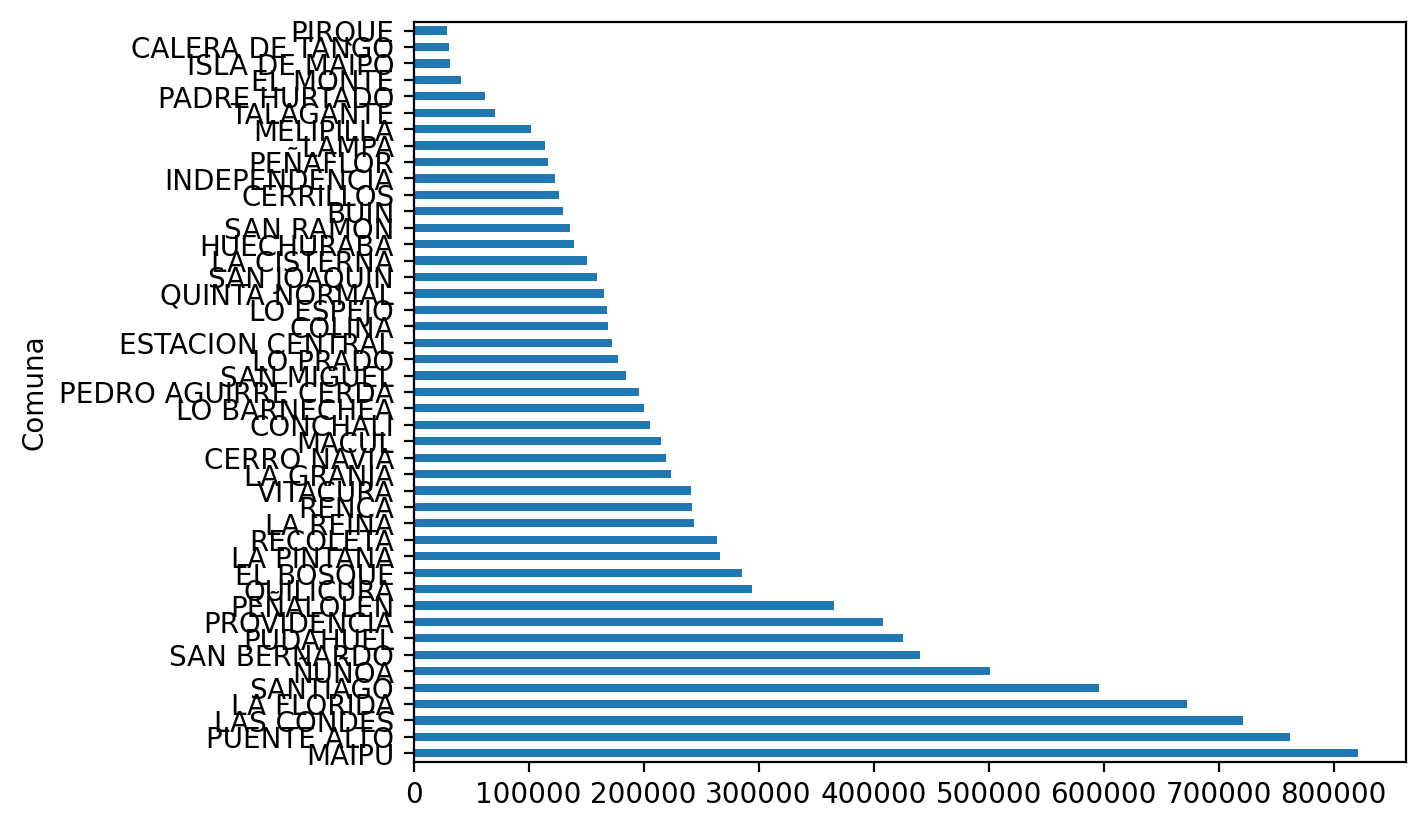

In [38]:
hogares_x_comuna.plot(kind="barh")

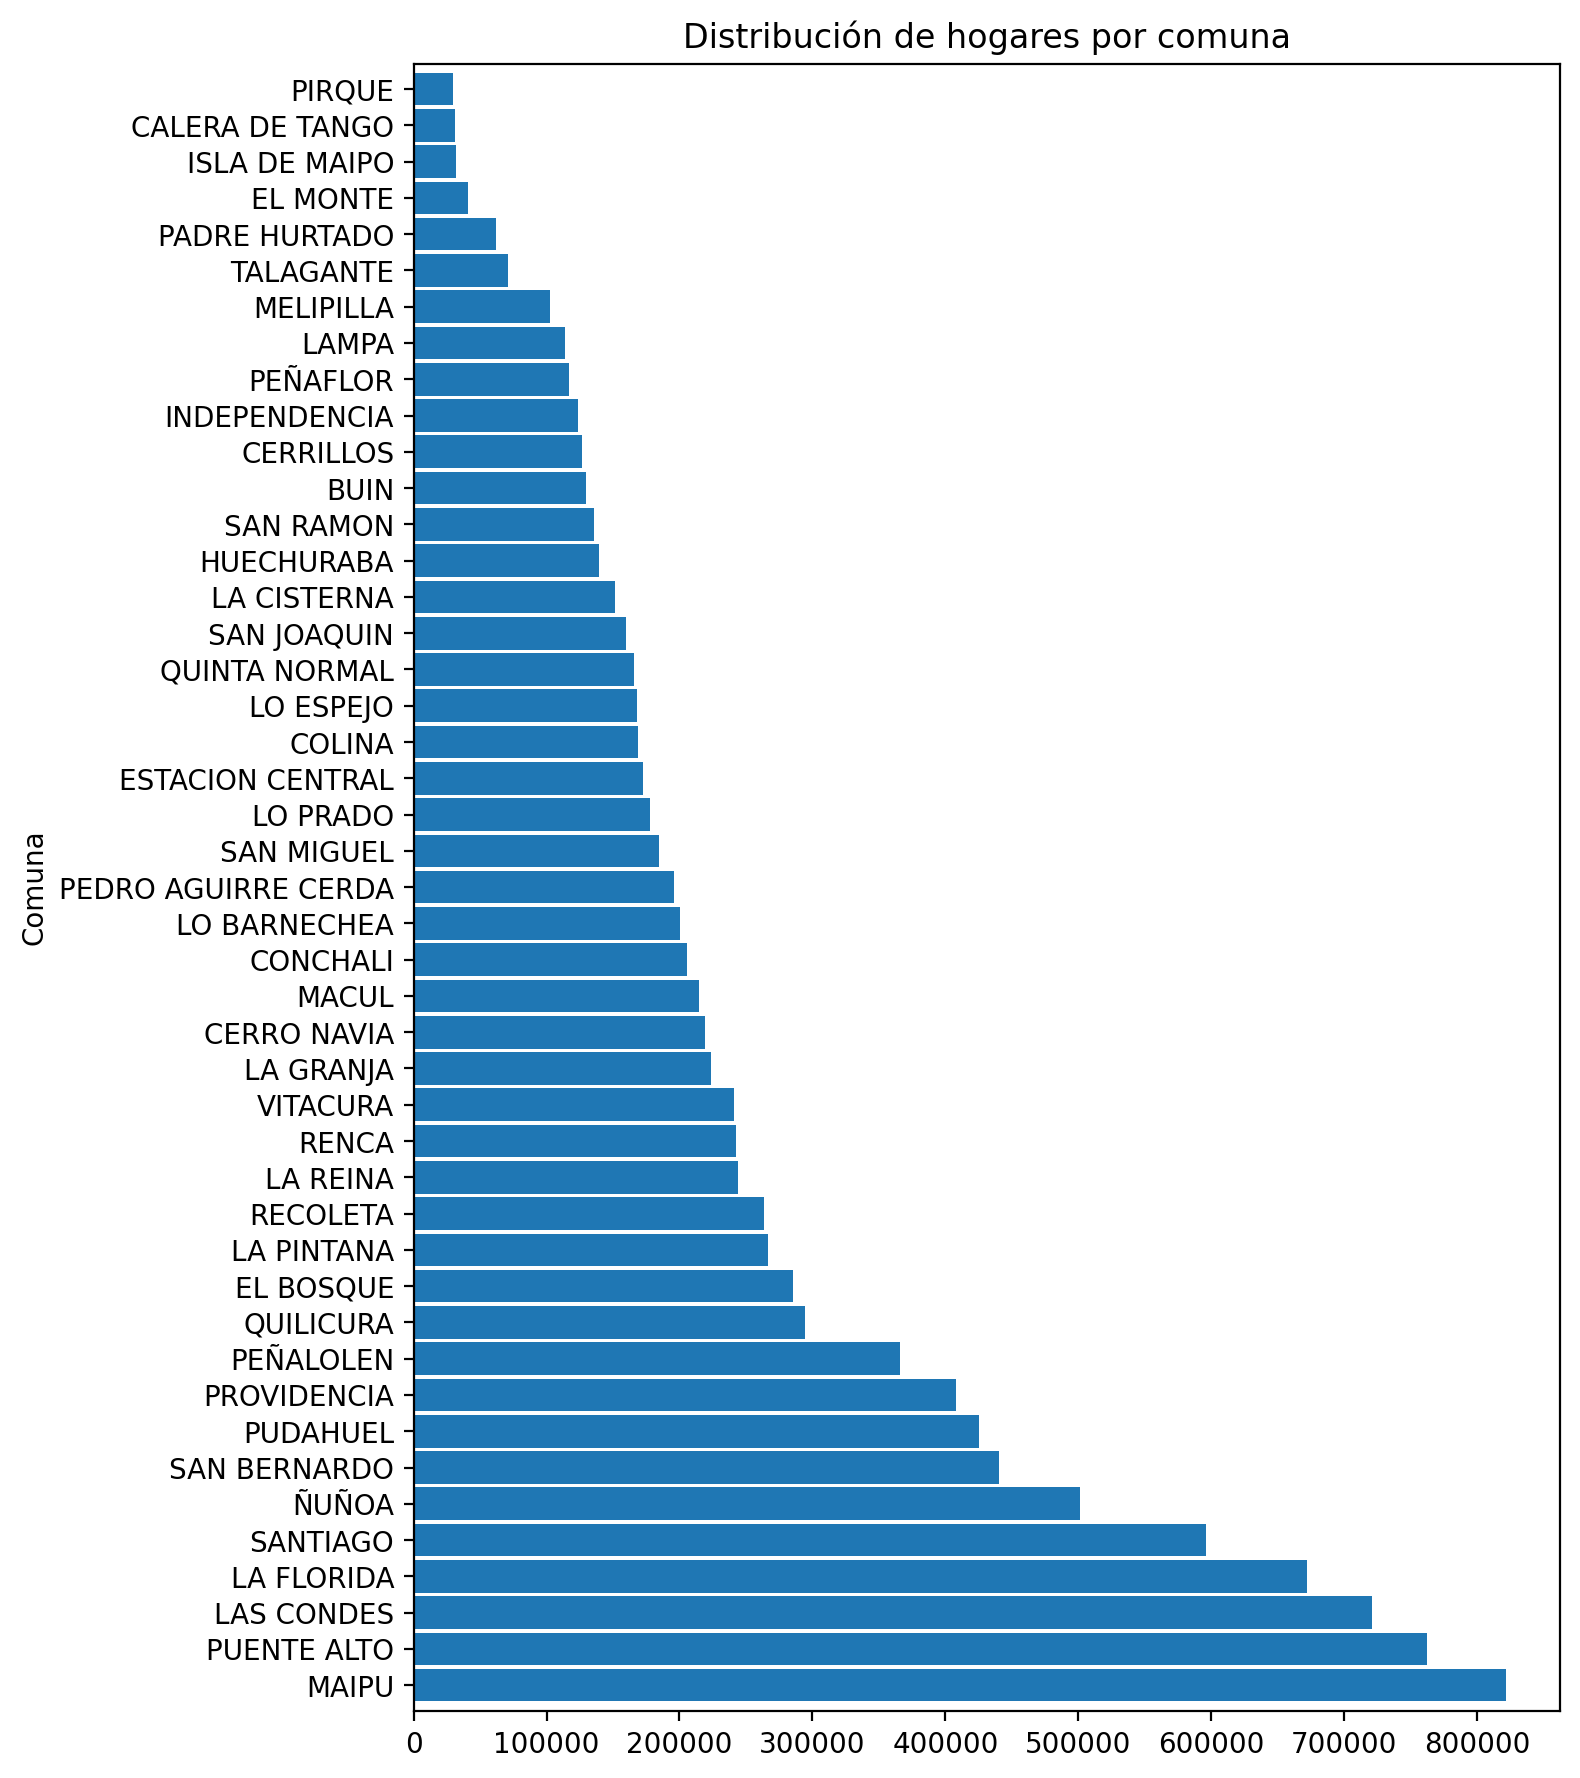

In [39]:
fig, ax = plt.subplots(figsize=(8,9))
#width=0.9 ajusta el ancho de las barras. El valor está en el rango de 0 a 1, donde 1 significa que las barras se tocan entre sí.
ax.set_xlabel("Cantidad de hogares")
ax = hogares_x_comuna.plot(kind="barh", width=0.9, ax=ax)

ax.set_title("Distribución de hogares por comuna")
#esto es útil para asegurarse de que las etiquetas, títulos y otros elementos del gráfico no se recorten.
fig.tight_layout()

**¿Cuáles son los tipos de viaje y cuánto duran?**
En este caso, lo que buscamos es saber para cada propósito de viaje el promedio de duración de éstos. Sin embargo, todes sabemos que existe variabilidad en los tiempos de viaje, ya que dependen de los modos de transporte utilizados y de la posición de los lugares de origen y destino. Entonces, necesitamos una manera de poder graficar esa variabilidad. Una manera directa de hacerlo es utilizar un gráfico de barras para mostrar el promedio.

<Axes: xlabel='TiempoViaje', ylabel='Proposito'>

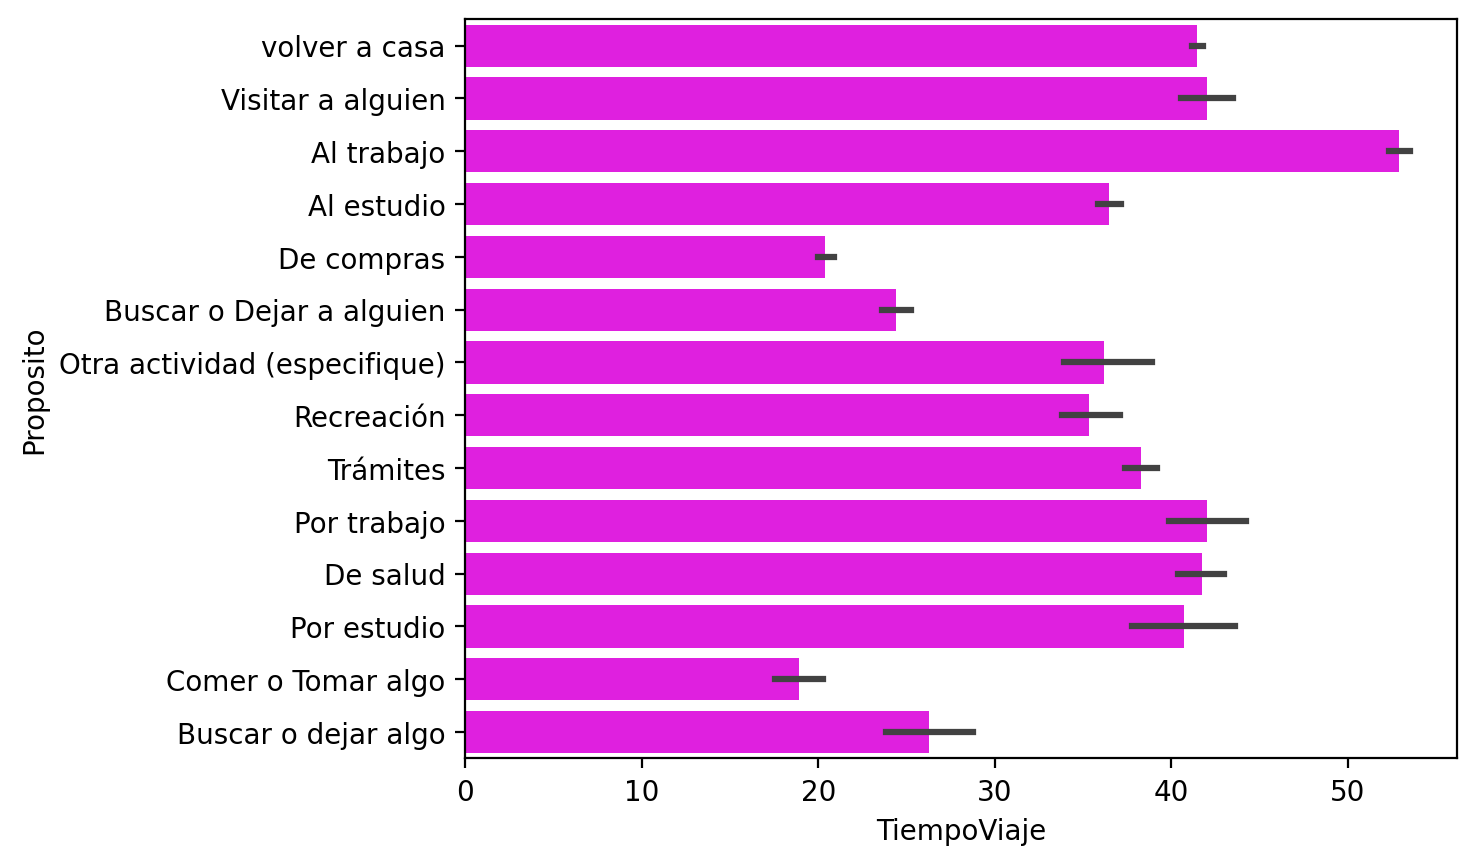

In [40]:
import seaborn as sns
sns.barplot(
    y="Proposito", x="TiempoViaje", data=viajes_persona_hogar, color="magenta"
)

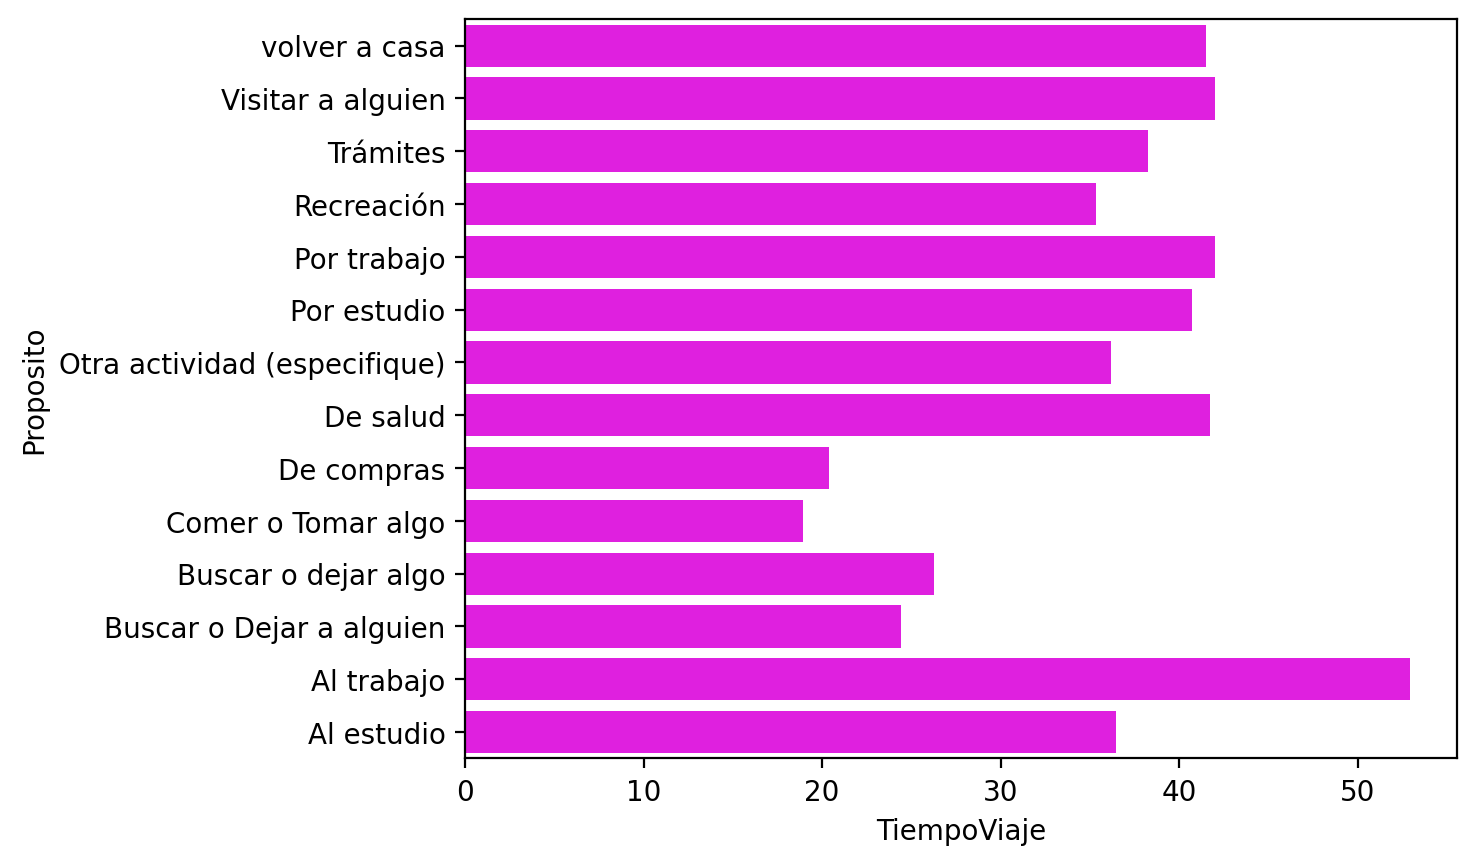

In [41]:
# Ordenar el DataFrame por 'TiempoViaje' de mayor a menor
viajes_persona_hogar_sorted=viajes_persona_hogar.groupby('Proposito')['TiempoViaje'].mean().reset_index().sort_values(by='Proposito', ascending=False)

# Ahora, crea el gráfico de barras usando Seaborn
sns.barplot(
    y="Proposito",
    x="TiempoViaje",
    data=viajes_persona_hogar_sorted,
    color="magenta"
)

# Mostrar el gráfico
plt.show()





Si quiero el gráfico ordenado de mayor a menor

In [42]:
viajes_persona_hogar.groupby('Proposito')['TiempoViaje'].mean().sort_values(ascending=False)

Proposito
Al trabajo                      52.909034
Por trabajo                     42.018821
Visitar a alguien               41.990399
De salud                        41.701598
volver a casa                   41.473723
Por estudio                     40.699115
Trámites                        38.257618
Al estudio                      36.458600
Otra actividad (especifique)    36.162362
Recreación                      35.330608
Buscar o dejar algo             26.277008
Buscar o Dejar a alguien        24.401836
De compras                      20.395953
Comer o Tomar algo              18.927593
Name: TiempoViaje, dtype: float64

In [43]:
order = viajes_persona_hogar.groupby('Proposito')['TiempoViaje'].mean().sort_values(ascending=False).index
order

Index(['Al trabajo', 'Por trabajo', 'Visitar a alguien', 'De salud',
       'volver a casa', 'Por estudio', 'Trámites', 'Al estudio',
       'Otra actividad (especifique)', 'Recreación', 'Buscar o dejar algo',
       'Buscar o Dejar a alguien', 'De compras', 'Comer o Tomar algo'],
      dtype='object', name='Proposito')

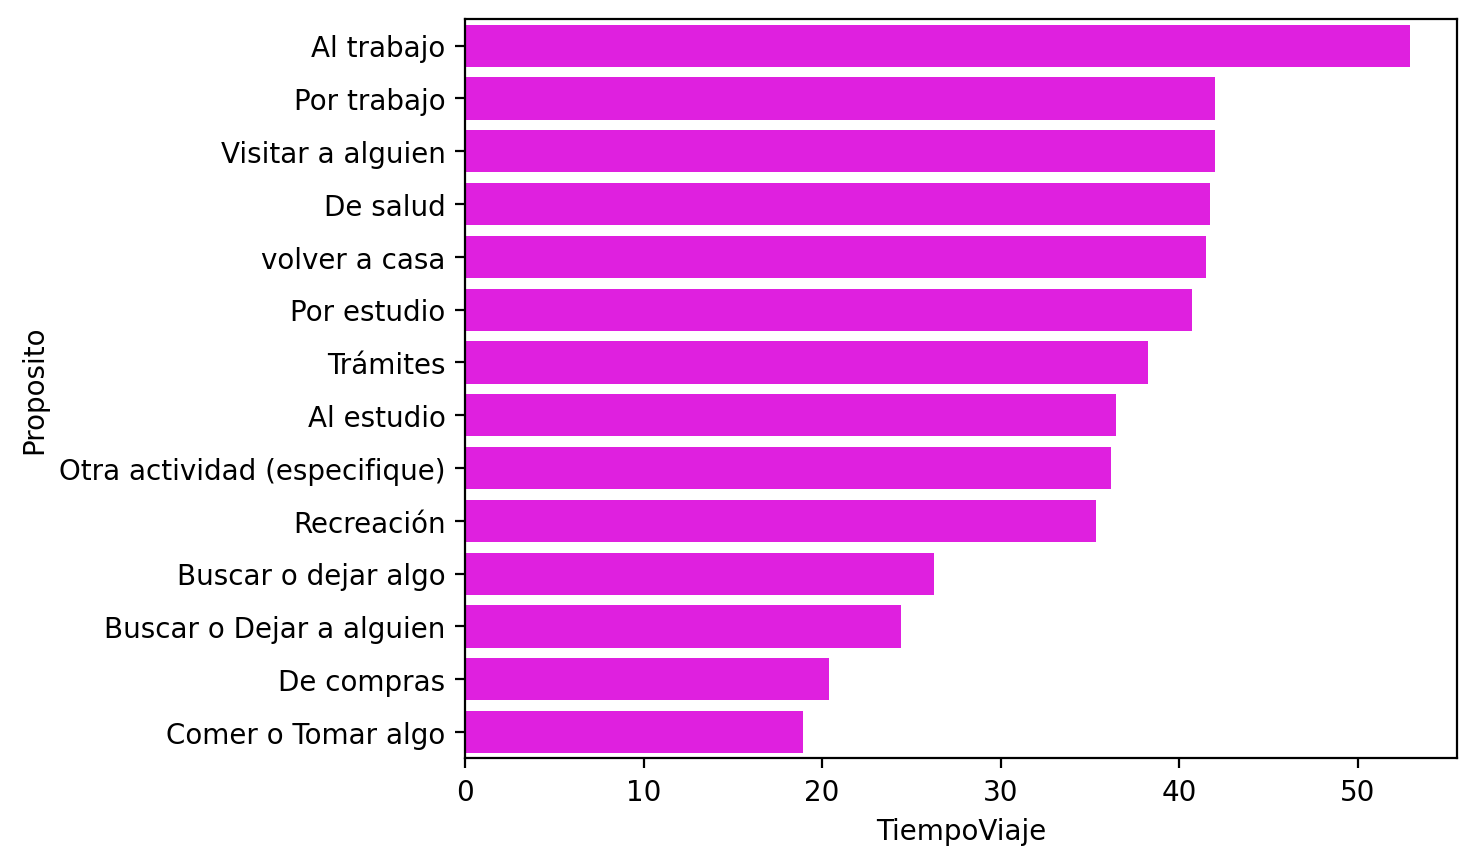

In [44]:
# Ordenar el DataFrame por 'TiempoViaje' de mayor a menor
viajes_persona_hogar_sorted=viajes_persona_hogar.groupby('Proposito')['TiempoViaje'].mean().reset_index().sort_values(by='Proposito', ascending=False)
order = viajes_persona_hogar.groupby('Proposito')['TiempoViaje'].mean().sort_values(ascending=False).index

# Ahora, crea el gráfico de barras usando Seaborn
sns.barplot(
    y="Proposito",
    x="TiempoViaje",
    data=viajes_persona_hogar_sorted,
    color="magenta",
    order=order
)

# Mostrar el gráfico
plt.show()


# Grafico de Barras Stackeado


**¿Cuál es la distribución de uso de modo de transporte en viajes al trabajo?**

 Entender la distribución de usos de transporte por comuna es importante para poder planificar nuevas estaciones de metro o nuevos recorridos de buses.

In [45]:
viajes_persona_hogar[viajes_persona_hogar["Proposito"] == "Al trabajo"]

Hogar   Persona       Viaje  Etapas  ComunaOrigen  ComunaDestino  \
2       173431  17343101  1734310101       2          94.0          328.0   
5       173441  17344101  1734410101       2          94.0           71.0   
7       173441  17344103  1734410301       2          94.0           91.0   
16      173462  17346201  1734620102       1          94.0           94.0   
23      173462  17346206  1734620601       2          94.0           82.0   
...        ...       ...         ...     ...           ...            ...   
100292  399931  39993101  3999310101       1          85.0          337.0   
100296  399941  39994101  3999410101       1          85.0           85.0   
100312  700990  70099001  7009900101       1         103.0          103.0   
100320  706781  70678102  7067810201       1         324.0          324.0   
100332  743823  74382301  7438230101       1          97.0           97.0   

        SectorOrigen  SectorDestino  ZonaOrigen  ZonaDestino  ...  NumVeh  \
2                2.0            2.0         407          126  ...       0   
5                2.0            3.0         407          307  ...       0   
7                2.0            3.0         407          437  ...       0   
16               2.0            2.0         398          398  ...       1   
23               2.0            2.0         398          537  ...       1   
...              ...            ...         ...          ...  ...     ...   
100292           7.0            5.0         857          341  ...       1   
100296           7.0            7.0         857          859  ...       0   
100312           7.0            7.0         785          789  ...       0   
100320           2.0            2.0          69           69  ...       0   
100332           5.0            5.0         235          235  ...       0   

        NumBicAdulto  NumBicNino  Propiedad  MontoDiv ImputadoDiv  MontoArr  \
2                  0           0          2   81067.0           1    120000   
5                  0           0          2   57000.0           0    140000   
7                  0           0          2   57000.0           0    140000   
16                 0           0          2  179854.0           1    230000   
23                 0           0          2  179854.0           1    230000   
...              ...         ...        ...       ...         ...       ...   
100292             0           0          1       NaN           0    160000   
100296             2           0          1       NaN           0    150000   
100312             1           1          1       NaN           0    100000   
100320             2           2          1       NaN           0    140000   
100332             1           0          1       NaN           0     80000   

       ImputadoArr  IngresoHogar FactorHogar  
2                0        789356   76.810280  
5                0        633883   76.810280  
7                0        633883   76.810280  
16               0       1359063   81.022255  
23               0       1359063   81.022255  
...            ...           ...         ...  
100292           0        520000  100.808945  
100296           0        285000   76.104340  
100312           0        300000   75.526031  
100320           0        695186  174.348663  
100332           0        140007  231.671707  

[17527 rows x 96 columns]

In [46]:
viajes_persona_hogar["ModoAgregado"] = viajes_persona_hogar["ModoDifusion"].map(
    {
        "Taxi": "Taxi",
        "Bip! - Otros Privado": "Público",
        "Bip!": "Público",
        "Bip! - Otros Público": "Público",
        "Taxi Colectivo": "Taxi",
        "Bicicleta": "Activo",
        "Caminata": "Activo",
        "Auto": "Auto",
        "Otros": "Otros",
    }
)


viajes_persona_hogar["ModoAgregado"].value_counts()

Público    33280
Auto       26429
Activo     24574
Otros       8475
Taxi        5190
Name: ModoAgregado, dtype: int64

In [47]:
# Filtrar los viajes cuyo propósito es "Al trabajo"
trabajo_viajes = viajes_persona_hogar[viajes_persona_hogar["Proposito"] == "Al trabajo"]

# Calcular el producto de los factores para cada fila
trabajo_viajes["ProductoFactores"] = trabajo_viajes["FactorPersona"] * trabajo_viajes["FactorLaboralNormal"]

# Agrupar por Comuna y ModoAgregado y sumar el ProductoFactores
modo_comuna = trabajo_viajes.groupby(["Comuna", "ModoAgregado"])["ProductoFactores"].sum()

# Desapilar los datos para obtener el DataFrame deseado
modo_comuna = modo_comuna.unstack(fill_value=0).drop(columns='Otros')
modo_comuna


<ipython-input-47-79abc6c191ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trabajo_viajes["ProductoFactores"] = trabajo_viajes["FactorPersona"] * trabajo_viajes["FactorLaboralNormal"]


ModoAgregado               Activo          Auto       Público         Taxi
Comuna                                                                    
BUIN                  2707.921319   2604.287917      0.000000  5681.632623
CALERA DE TANGO       1552.383136   1628.919020     19.865406   291.329418
CERRILLOS              880.700232   7278.168297   6051.499482   352.205110
CERRO NAVIA           1503.268313   8706.967095  17798.271168   242.490891
COLINA                1238.703521   6718.857099      0.000000   570.730219
CONCHALI              3392.466434   6299.645186  17126.517983   151.905982
EL BOSQUE             2494.051735  16445.271169  15500.924628  1376.975223
EL MONTE              1165.623951   2860.131985     55.245320   611.007226
ESTACION CENTRAL      6983.877811  13861.929832  11387.227075   400.725164
HUECHURABA            2059.077623  10567.805907   7990.008763     0.000000
INDEPENDENCIA         4237.232978   7049.456489   4382.460402   381.185666
ISLA DE MAIPO         1502.573454   1717.102923      0.000000    61.594354
LA CISTERNA           2225.740008   4912.993454   5180.088123  1031.996882
LA FLORIDA            4707.407560  39849.657862  52603.143148  2533.540964
LA GRANJA             5288.031428  11265.258210  18377.407367   846.358517
LA PINTANA            2943.897061  13546.625876  31857.353028   488.737105
LA REINA              3984.752802  16824.081676   7910.965290   794.655343
LAMPA                 2473.953136   5282.097556      0.000000   358.458354
LAS CONDES           15281.902415  57469.862733  26647.239390  2551.038137
LO BARNECHEA          1634.442502  24087.789506   4662.730960   179.893514
LO ESPEJO             3176.110806   9265.124719   6694.754902  1074.274835
LO PRADO               326.724321   3036.340451  17408.898064   159.768933
MACUL                 3376.829697  12006.096018  11965.659034   421.113594
MAIPU                 7981.782856  44626.033264  53740.173962  5027.114407
MELIPILLA             2789.500428   6715.669081      0.000000  1830.232182
PADRE HURTADO          902.031725   2419.059681    563.188972   619.227097
PEDRO AGUIRRE CERDA   1932.009891  16825.662876  11717.108493   612.274401
PEÑAFLOR              2112.670745   4724.060215    296.527305   855.071320
PEÑALOLEN             7785.976714  25646.419013  21041.469051   617.362326
PIRQUE                 277.173774   2698.688628     64.929884     0.000000
PROVIDENCIA           8487.375635  30621.371523  10452.247842  1000.632171
PUDAHUEL              3293.387735  16342.504667  31471.611156   577.525468
PUENTE ALTO           8826.410560  29565.154755  62129.942770  4402.861220
QUILICURA             7750.370552  10661.093482  24351.263903  2952.855658
QUINTA NORMAL         2916.082079   8466.765274  11317.577120   237.349574
RECOLETA              9851.656692  19720.480113  13652.997988   428.232789
RENCA                 3313.404200  22531.535875  18929.265767   122.966073
SAN BERNARDO          9719.469466  20631.386410  14057.797894  4750.541159
SAN JOAQUIN           4330.092546   7626.677796  10682.444936   277.904015
SAN MIGUEL            1827.574670  10782.442801   8022.529142    59.120291
SAN RAMON             1327.563373  13775.813876  10735.782090   601.274416
SANTIAGO             42268.418440  28702.228276  44425.360270  2795.586240
TALAGANTE             1055.098128   3111.839231      0.000000  4333.050668
VITACURA              3926.410761  21804.513246   6869.605060  1310.521766
ÑUÑOA                15001.213889  34568.371855  23746.011804  4199.183379

<Axes: xlabel='Comuna'>

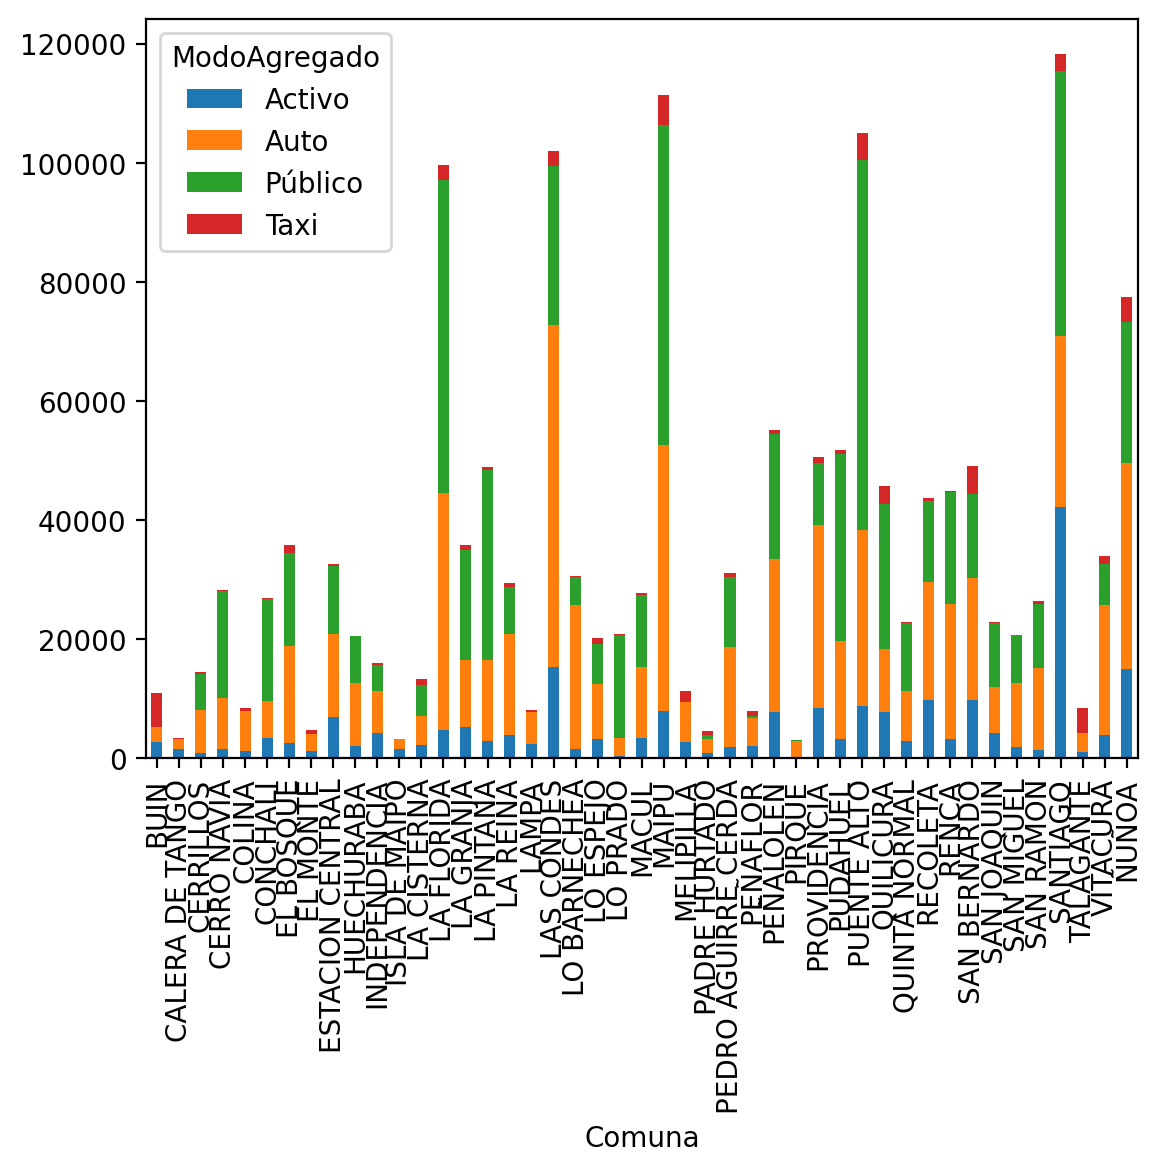

In [48]:
modo_comuna.plot(kind='bar', stacked=True)

In [49]:
# Normalizar cada fila para que la suma sea 1
modo_comuna_normalized = modo_comuna.div(modo_comuna.sum(axis=1), axis=0)


# Muestra el DataFrame normalizado
modo_comuna_normalized


ModoAgregado           Activo      Auto   Público      Taxi
Comuna                                                     
BUIN                 0.246313  0.236886  0.000000  0.516801
CALERA DE TANGO      0.444491  0.466405  0.005688  0.083416
CERRILLOS            0.060477  0.499786  0.415552  0.024186
CERRO NAVIA          0.053211  0.308200  0.630005  0.008583
COLINA               0.145246  0.787832  0.000000  0.066922
CONCHALI             0.125784  0.233575  0.635008  0.005632
EL BOSQUE            0.069633  0.459144  0.432779  0.038445
EL MONTE             0.248428  0.609575  0.011774  0.130223
ESTACION CENTRAL     0.214008  0.424773  0.348940  0.012279
HUECHURABA           0.099873  0.512580  0.387547  0.000000
INDEPENDENCIA        0.263997  0.439209  0.273045  0.023749
ISLA DE MAIPO        0.457924  0.523304  0.000000  0.018771
LA CISTERNA          0.166712  0.367992  0.387998  0.077298
LA FLORIDA           0.047219  0.399721  0.527647  0.025413
LA GRANJA            0.147805  0.314874  0.513665  0.023656
LA PINTANA           0.060281  0.277387  0.652325  0.010008
LA REINA             0.135010  0.570029  0.268037  0.026924
LAMPA                0.304880  0.650945  0.000000  0.044175
LAS CONDES           0.149896  0.563706  0.261375  0.025022
LO BARNECHEA         0.053475  0.788088  0.152552  0.005886
LO ESPEJO            0.157153  0.458437  0.331255  0.053155
LO PRADO             0.015609  0.145059  0.831699  0.007633
MACUL                0.121601  0.432345  0.430889  0.015165
MAIPU                0.071666  0.400682  0.482515  0.045137
MELIPILLA            0.246087  0.592451  0.000000  0.161462
PADRE HURTADO        0.200295  0.537150  0.125056  0.137499
PEDRO AGUIRRE CERDA  0.062148  0.541243  0.376913  0.019695
PEÑAFLOR             0.264470  0.591370  0.037120  0.107040
PEÑALOLEN            0.141329  0.465526  0.381939  0.011206
PIRQUE               0.091152  0.887495  0.021353  0.000000
PROVIDENCIA          0.167862  0.605625  0.206723  0.019790
PUDAHUEL             0.063720  0.316194  0.608912  0.011174
PUENTE ALTO          0.084122  0.281776  0.592140  0.041962
QUILICURA            0.169535  0.233205  0.532669  0.064592
QUINTA NORMAL        0.127130  0.369119  0.493403  0.010348
RECOLETA             0.225679  0.451752  0.312759  0.009810
RENCA                0.073800  0.501848  0.421614  0.002739
SAN BERNARDO         0.197714  0.419685  0.285965  0.096636
SAN JOAQUIN          0.188946  0.332794  0.466134  0.012126
SAN MIGUEL           0.088324  0.521101  0.387718  0.002857
SAN RAMON            0.050210  0.521013  0.406037  0.022741
SANTIAGO             0.357626  0.242845  0.375876  0.023653
TALAGANTE            0.124129  0.366099  0.000000  0.509771
VITACURA             0.115786  0.642991  0.202577  0.038646
ÑUÑOA                0.193527  0.445958  0.306342  0.054173

In [50]:
modo_comuna_normalized.columns

Index(['Activo', 'Auto', 'Público', 'Taxi'], dtype='object', name='ModoAgregado')

<Axes: xlabel='Comuna'>

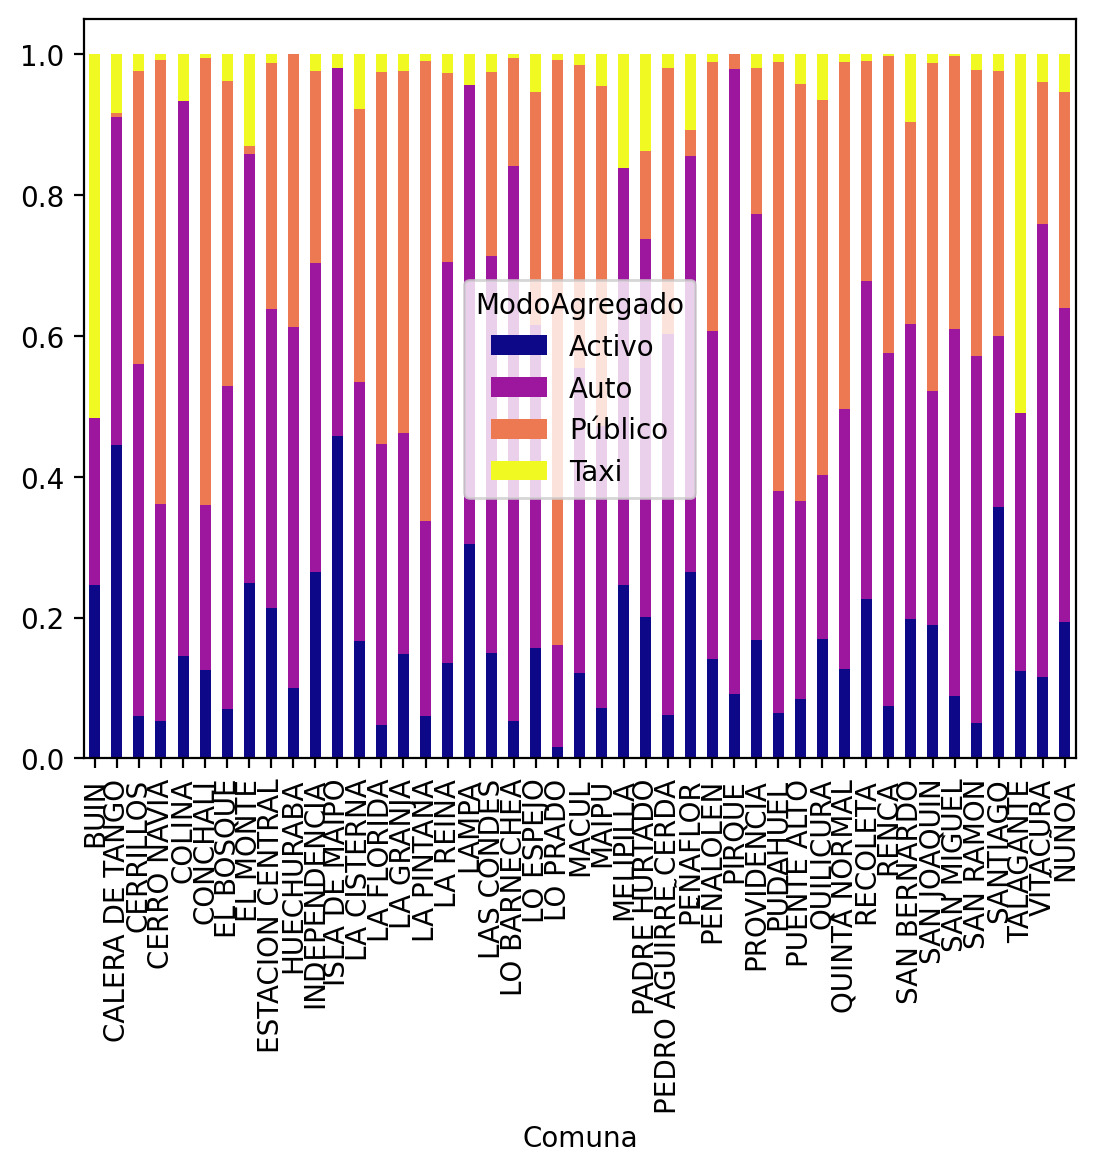

In [51]:
modo_comuna_normalized.plot(kind='bar', stacked=True, colormap='plasma')

In [52]:
modo_comuna_normalized = modo_comuna_normalized.reset_index().set_index('Comuna')

modo_comuna_normalized

ModoAgregado           Activo      Auto   Público      Taxi
Comuna                                                     
BUIN                 0.246313  0.236886  0.000000  0.516801
CALERA DE TANGO      0.444491  0.466405  0.005688  0.083416
CERRILLOS            0.060477  0.499786  0.415552  0.024186
CERRO NAVIA          0.053211  0.308200  0.630005  0.008583
COLINA               0.145246  0.787832  0.000000  0.066922
CONCHALI             0.125784  0.233575  0.635008  0.005632
EL BOSQUE            0.069633  0.459144  0.432779  0.038445
EL MONTE             0.248428  0.609575  0.011774  0.130223
ESTACION CENTRAL     0.214008  0.424773  0.348940  0.012279
HUECHURABA           0.099873  0.512580  0.387547  0.000000
INDEPENDENCIA        0.263997  0.439209  0.273045  0.023749
ISLA DE MAIPO        0.457924  0.523304  0.000000  0.018771
LA CISTERNA          0.166712  0.367992  0.387998  0.077298
LA FLORIDA           0.047219  0.399721  0.527647  0.025413
LA GRANJA            0.147805  0.314874  0.513665  0.023656
LA PINTANA           0.060281  0.277387  0.652325  0.010008
LA REINA             0.135010  0.570029  0.268037  0.026924
LAMPA                0.304880  0.650945  0.000000  0.044175
LAS CONDES           0.149896  0.563706  0.261375  0.025022
LO BARNECHEA         0.053475  0.788088  0.152552  0.005886
LO ESPEJO            0.157153  0.458437  0.331255  0.053155
LO PRADO             0.015609  0.145059  0.831699  0.007633
MACUL                0.121601  0.432345  0.430889  0.015165
MAIPU                0.071666  0.400682  0.482515  0.045137
MELIPILLA            0.246087  0.592451  0.000000  0.161462
PADRE HURTADO        0.200295  0.537150  0.125056  0.137499
PEDRO AGUIRRE CERDA  0.062148  0.541243  0.376913  0.019695
PEÑAFLOR             0.264470  0.591370  0.037120  0.107040
PEÑALOLEN            0.141329  0.465526  0.381939  0.011206
PIRQUE               0.091152  0.887495  0.021353  0.000000
PROVIDENCIA          0.167862  0.605625  0.206723  0.019790
PUDAHUEL             0.063720  0.316194  0.608912  0.011174
PUENTE ALTO          0.084122  0.281776  0.592140  0.041962
QUILICURA            0.169535  0.233205  0.532669  0.064592
QUINTA NORMAL        0.127130  0.369119  0.493403  0.010348
RECOLETA             0.225679  0.451752  0.312759  0.009810
RENCA                0.073800  0.501848  0.421614  0.002739
SAN BERNARDO         0.197714  0.419685  0.285965  0.096636
SAN JOAQUIN          0.188946  0.332794  0.466134  0.012126
SAN MIGUEL           0.088324  0.521101  0.387718  0.002857
SAN RAMON            0.050210  0.521013  0.406037  0.022741
SANTIAGO             0.357626  0.242845  0.375876  0.023653
TALAGANTE            0.124129  0.366099  0.000000  0.509771
VITACURA             0.115786  0.642991  0.202577  0.038646
ÑUÑOA                0.193527  0.445958  0.306342  0.054173

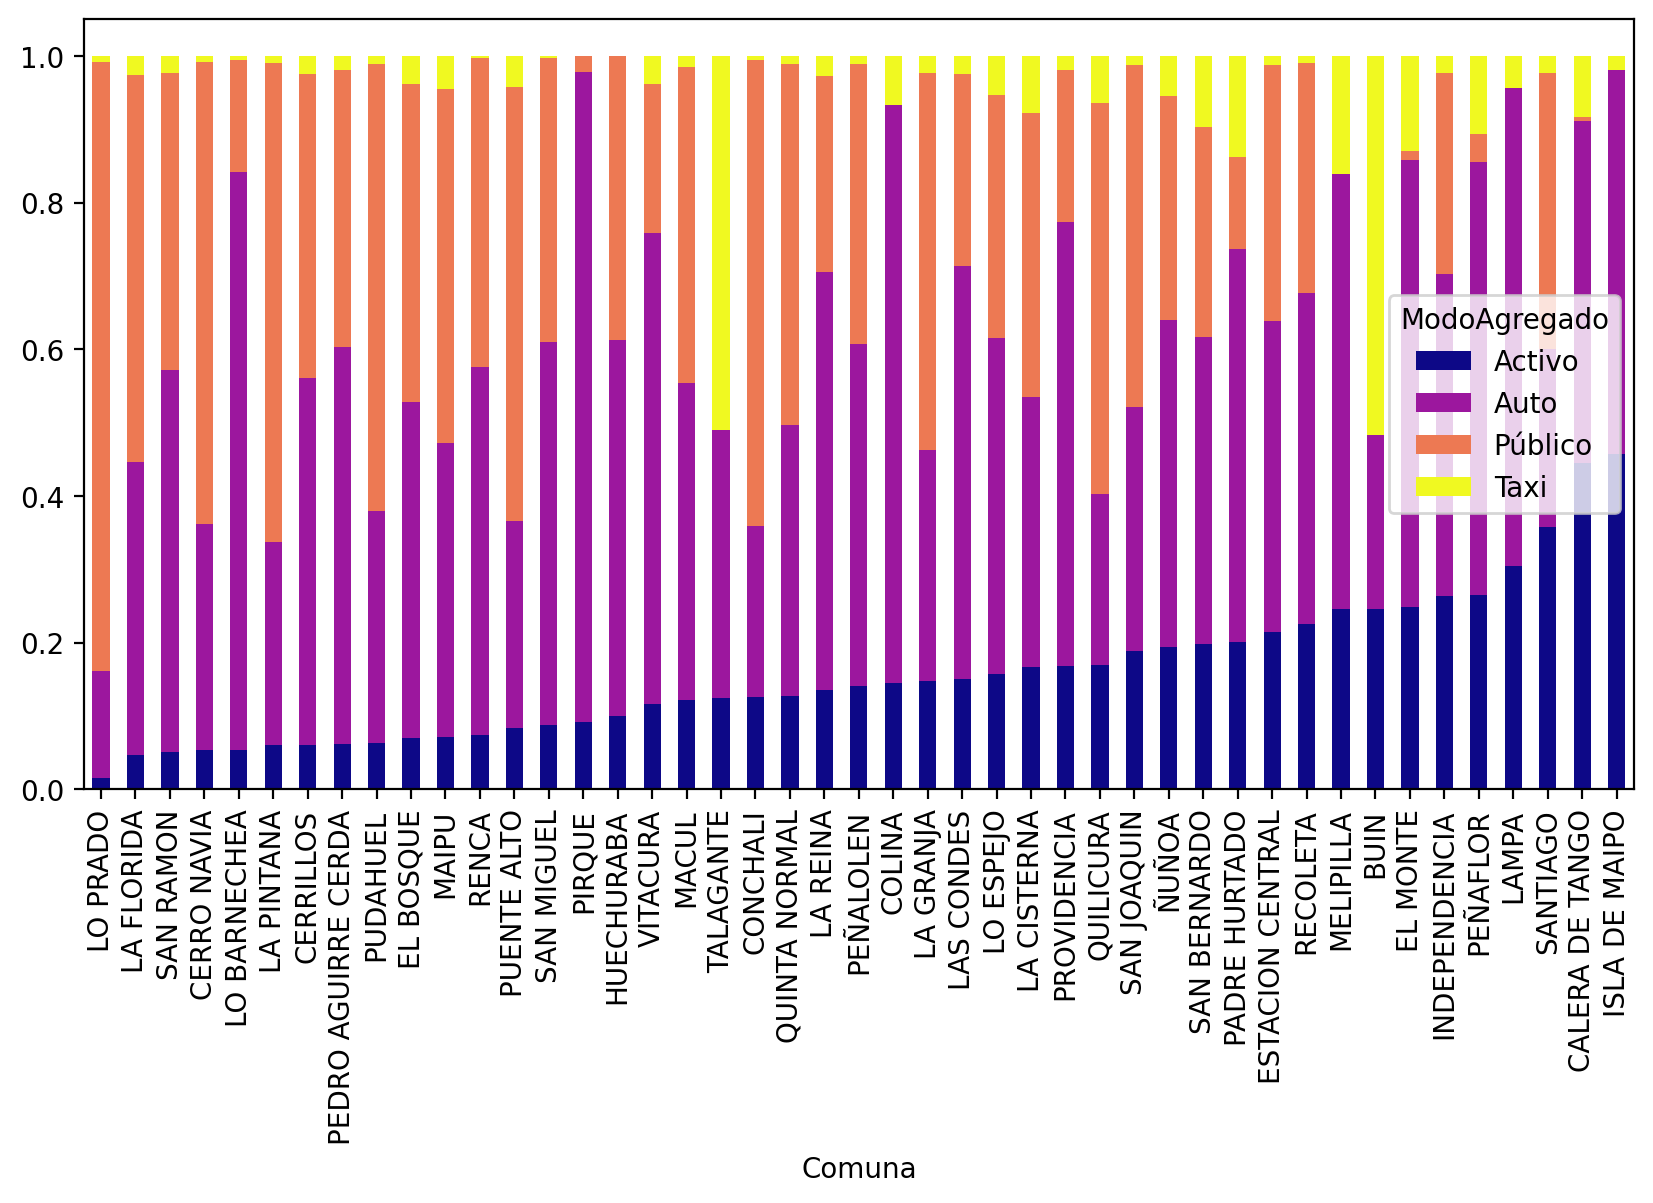

In [53]:
# Ordenar las filas del DataFrame normalizado según la columna 'Auto'
modo_comuna_sorted = modo_comuna_normalized.sort_values(by='Activo')

# Crear el gráfico de barras apiladas con la paleta de colores 'plasma'
modo_comuna_sorted.plot(kind='bar', stacked=True, colormap='plasma', figsize = (10, 5) )

# Mostrar el gráfico
plt.show()

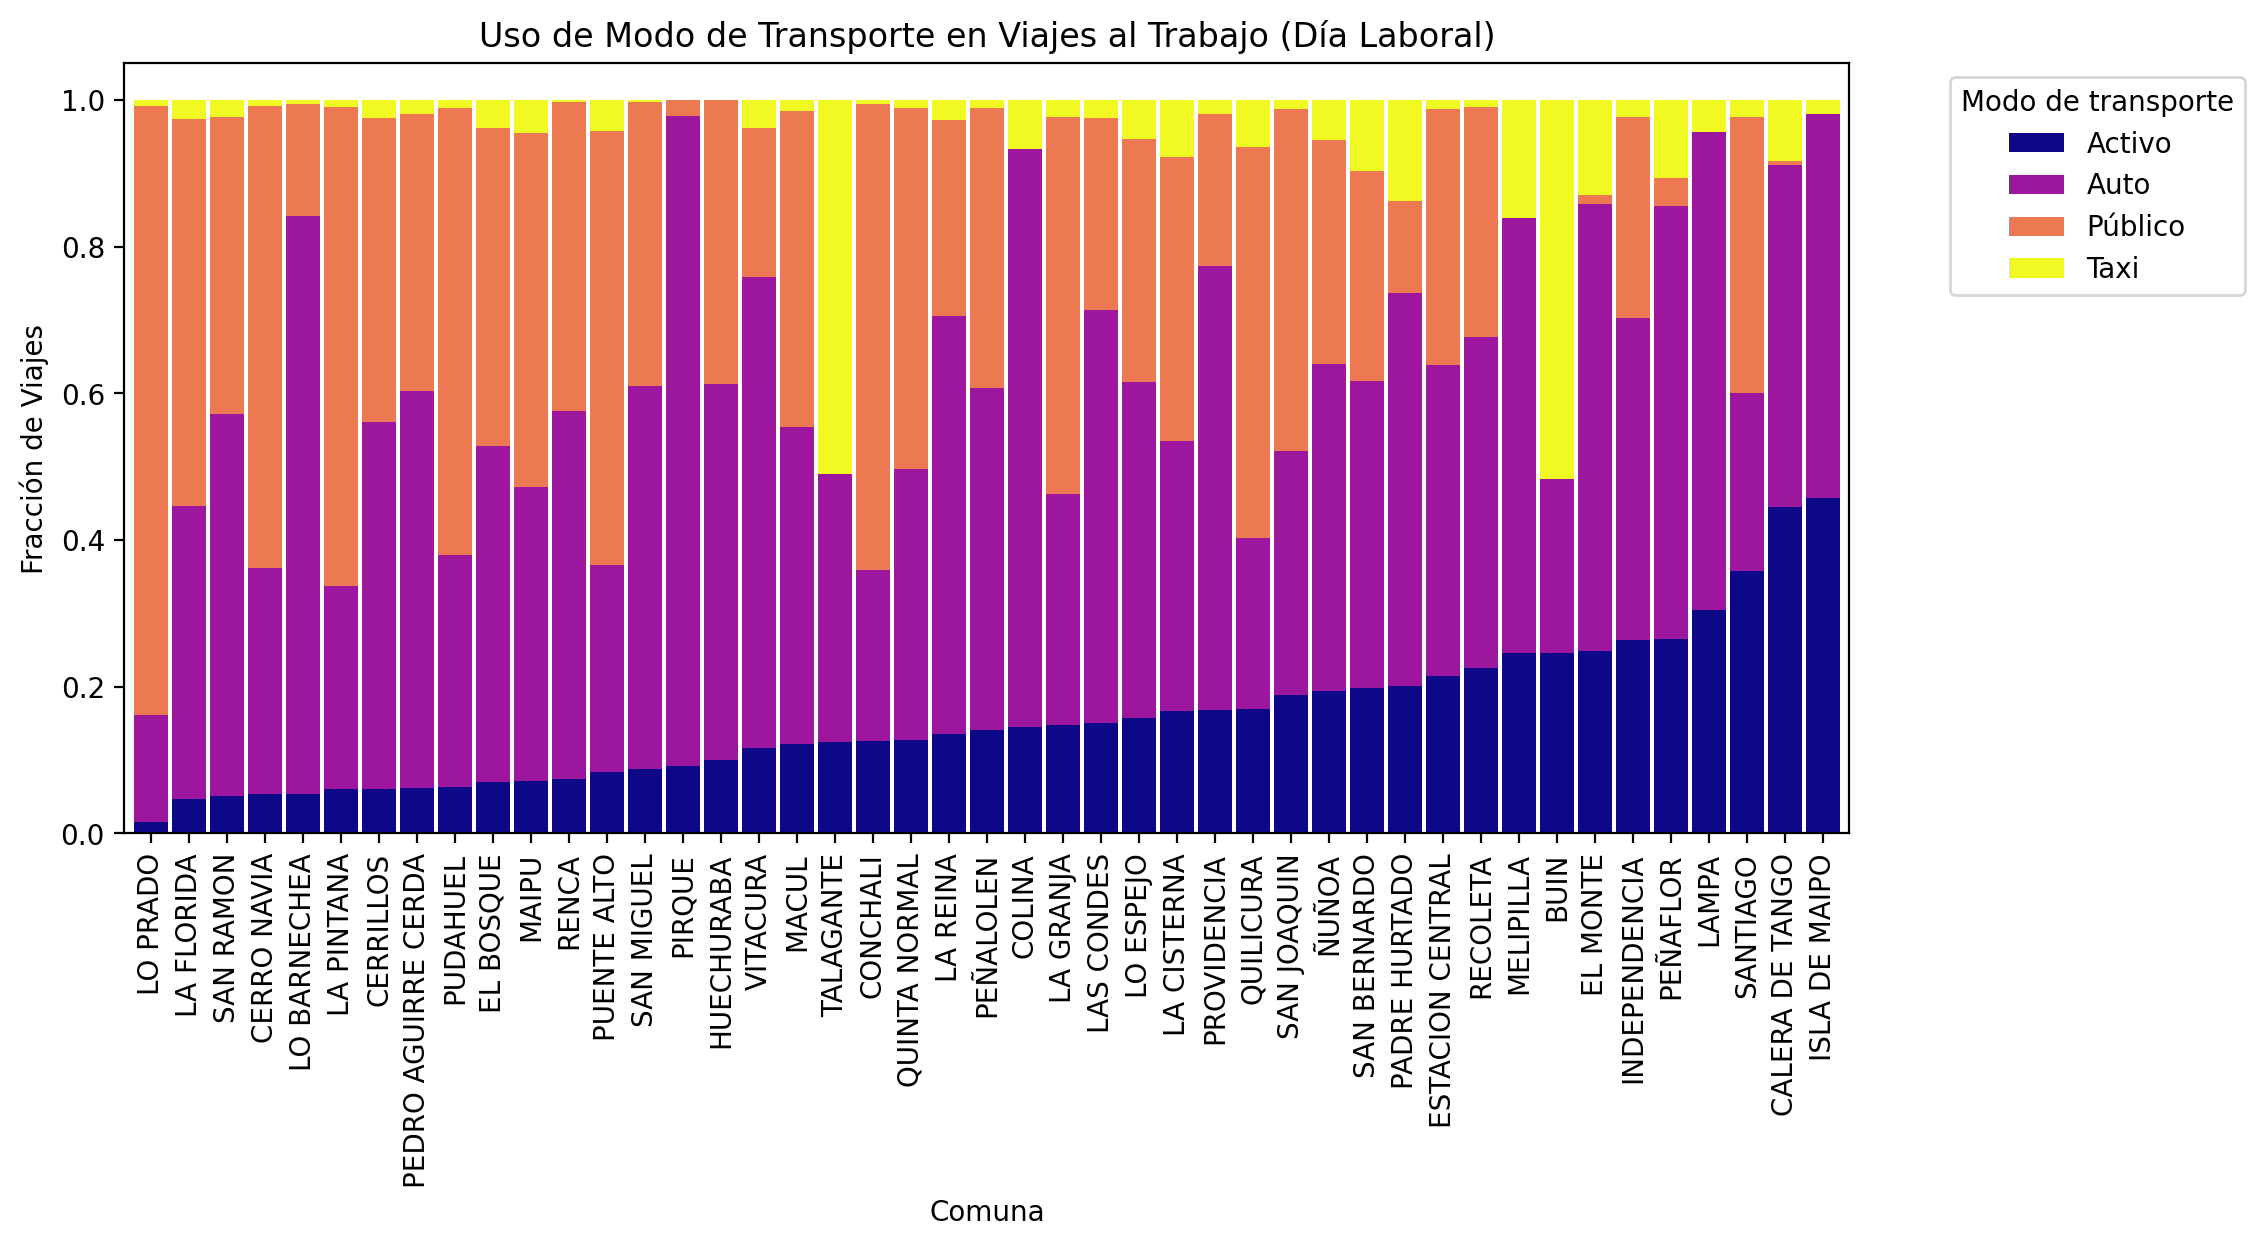

In [54]:
# Ordenar las filas del DataFrame normalizado según la columna 'Auto'
modo_comuna_sorted2 = modo_comuna_normalized.sort_values(by='Activo')

# Crear el gráfico de barras apiladas con la paleta de colores 'plasma'
ax = modo_comuna_sorted2.plot(kind='bar', stacked=True, colormap='plasma', figsize=(15, 5), width=0.9)

# Colocar la leyenda fuera del gráfico, a la derecha
ax.legend(title='Modo de transporte', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar los márgenes para evitar que la leyenda se corte
plt.subplots_adjust(right=0.7)

# Agregar título y nombre al eje y
ax.set_title('Uso de Modo de Transporte en Viajes al Trabajo (Día Laboral)')
ax.set_ylabel('Fracción de Viajes')


# Mostrar el gráfico
plt.show()

Nos gustaría ordenar el gráfico el numero de viajes en Auto

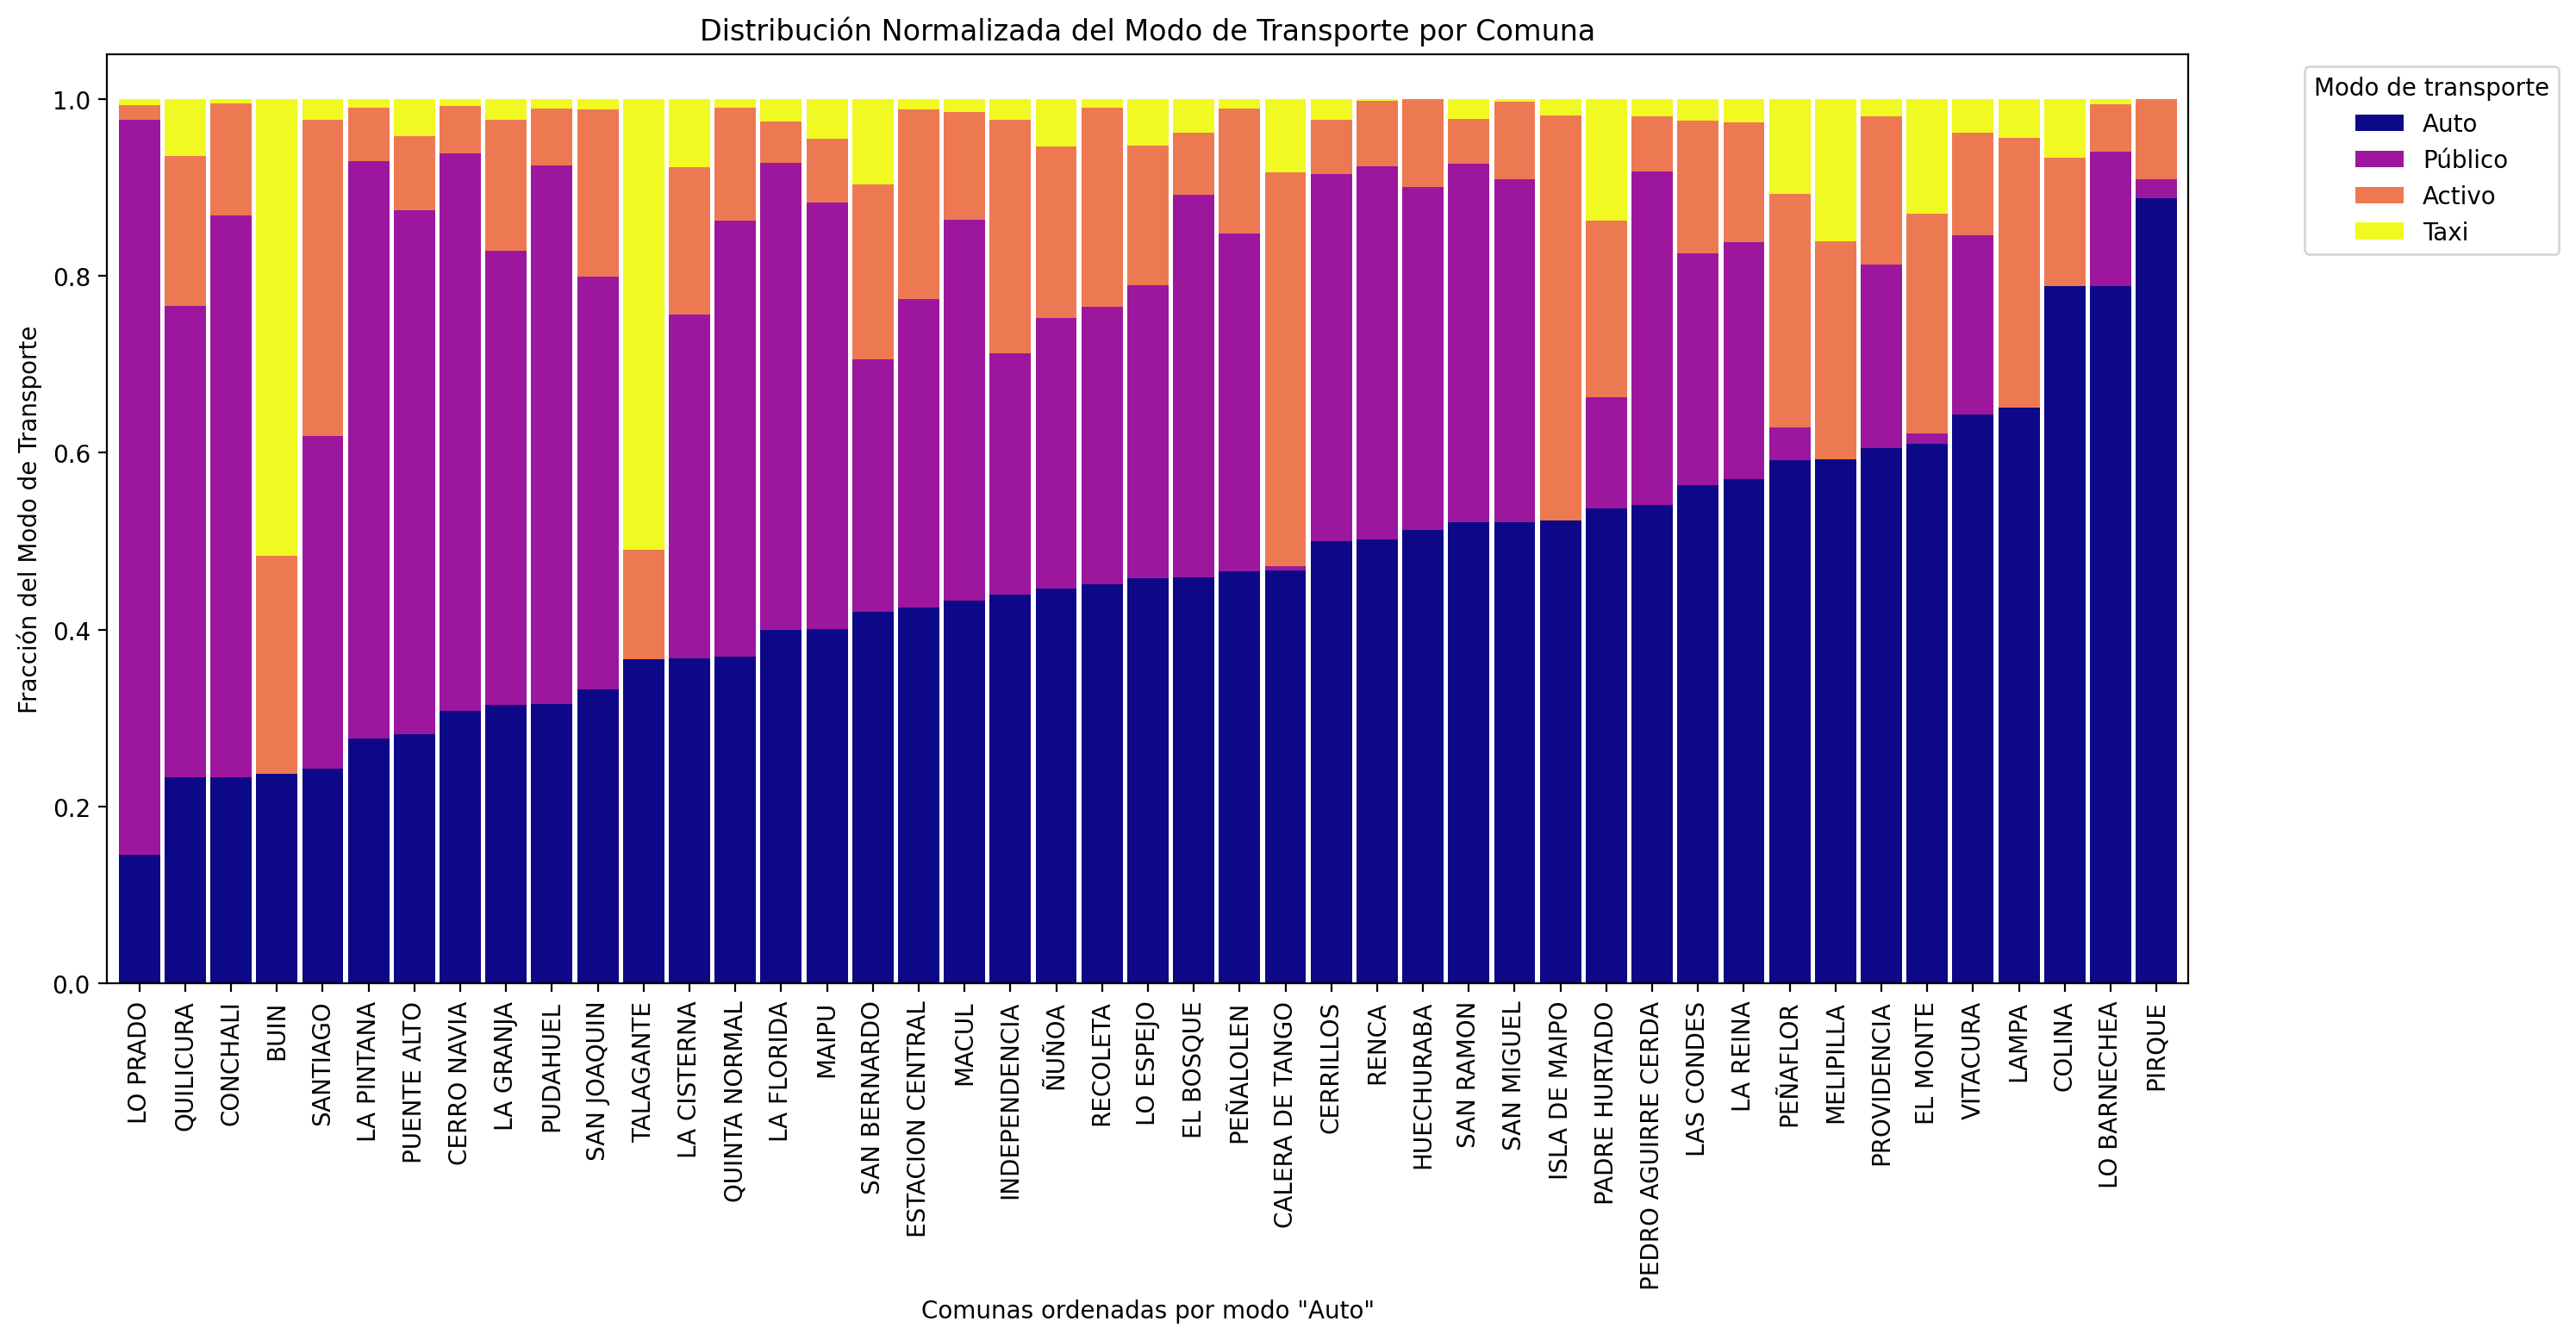

In [55]:
# Ordenar las filas del DataFrame normalizado según la columna 'Auto'
modo_comuna_sorted3 = modo_comuna_normalized.sort_values(by=['Auto'])

# Asegurarse de que la columna 'Auto' esté al principio
column_order = ['Auto', 'Público', 'Activo', 'Taxi']
modo_comuna_sorted3 = modo_comuna_sorted3[column_order]

# Crear el gráfico de barras apiladas con la paleta de colores 'plasma'
ax = modo_comuna_sorted3.plot(kind='bar', stacked=True, colormap='plasma', figsize=(21, 7), width=0.9)

# Colocar la leyenda fuera del gráfico, a la derecha
ax.legend(title='Modo de transporte', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar los márgenes para evitar que la leyenda se corte
plt.subplots_adjust(right=0.7)

# Agregar título y nombre al eje y
ax.set_title('Distribución Normalizada del Modo de Transporte por Comuna')
ax.set_ylabel('Fracción del Modo de Transporte')

# Establecer el nombre del eje x
ax.set_xlabel('Comunas ordenadas por modo "Auto"')

# Mostrar el gráfico
plt.show()

# Histogramas


Un histograma es un tipo de gráfico que se utiliza para representar la distribución de frecuencias de un conjunto de datos. Cada barra en un histograma representa la frecuencia (o cantidad) de datos que caen dentro de un rango específico o intervalo, conocido como "bin" o "clase". Los histogramas son una herramienta común en estadística y análisis de datos para visualizar la distribución de una variable numérica.

¿Cuál es la distribución de edad de las personas encuestadas?

In [56]:
import seaborn as sns


In [57]:
viajes_persona_hogar[['Persona', 'AnoNac']]

Persona  AnoNac
0       17343102    1972
1       17343102    1972
2       17343101    1989
3       17343101    1989
4       17343101    1989
...          ...     ...
100329  74381301    1943
100330  74381302    1943
100331  74381302    1943
100332  74382301    1957
100333  74382301    1957

[100334 rows x 2 columns]

In [58]:
viajes_persona_hogar_unique = viajes_persona_hogar.drop_duplicates(subset=['Persona', 'AnoNac'])
viajes_persona_hogar_unique

Hogar   Persona       Viaje  Etapas  ComunaOrigen  ComunaDestino  \
0       173431  17343102  1734310202       1          94.0           94.0   
2       173431  17343101  1734310101       2          94.0          328.0   
5       173441  17344101  1734410101       2          94.0           71.0   
7       173441  17344103  1734410301       2          94.0           91.0   
9       173451  17345101  1734510101       1          94.0           70.0   
...        ...       ...         ...     ...           ...            ...   
100324  706781  70678104  7067810401       1         324.0          324.0   
100326  706791  70679101  7067910101       1         324.0          324.0   
100328  743813  74381301  7438130101       1          97.0           97.0   
100330  743813  74381302  7438130201       1          97.0           97.0   
100332  743823  74382301  7438230101       1          97.0           97.0   

        SectorOrigen  SectorDestino  ZonaOrigen  ZonaDestino  ...  NumVeh  \
0                2.0            2.0         400          407  ...       0   
2                2.0            2.0         407          126  ...       0   
5                2.0            3.0         407          307  ...       0   
7                2.0            3.0         407          437  ...       0   
9                2.0            4.0         418           18  ...       1   
...              ...            ...         ...          ...  ...     ...   
100324           2.0            2.0          69           69  ...       0   
100326           2.0            2.0          69           73  ...       0   
100328           5.0            5.0         244          235  ...       0   
100330           5.0            5.0         244          235  ...       0   
100332           5.0            5.0         235          235  ...       0   

        NumBicAdulto  NumBicNino  Propiedad MontoDiv ImputadoDiv  MontoArr  \
0                  0           0          2  81067.0           1    120000   
2                  0           0          2  81067.0           1    120000   
5                  0           0          2  57000.0           0    140000   
7                  0           0          2  57000.0           0    140000   
9                  0           0          1      NaN           0    230000   
...              ...         ...        ...      ...         ...       ...   
100324             2           2          1      NaN           0    140000   
100326             0           0          1      NaN           0    200000   
100328             0           0          1      NaN           0     80000   
100330             0           0          1      NaN           0     80000   
100332             1           0          1      NaN           0     80000   

       ImputadoArr IngresoHogar FactorHogar  
0                0       789356   76.810280  
2                0       789356   76.810280  
5                0       633883   76.810280  
7                0       633883   76.810280  
9                0       430000   88.544052  
...            ...          ...         ...  
100324           0       695186  174.348663  
100326           0       396715   71.358963  
100328           0       318005   68.410446  
100330           0       318005   68.410446  
100332           0       140007  231.671707  

[42614 rows x 96 columns]

<Axes: xlabel='AnoNac', ylabel='Count'>

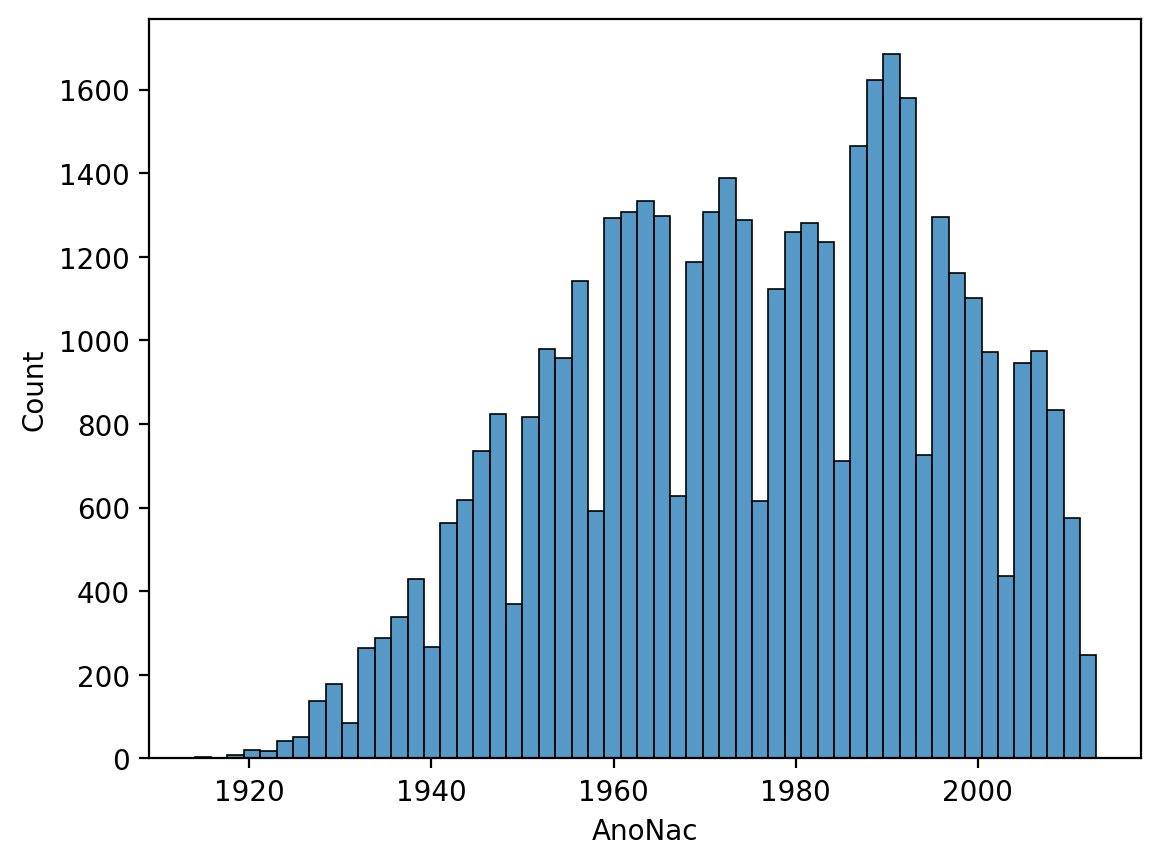

In [59]:
sns.histplot(data=viajes_persona_hogar_unique, x='AnoNac')

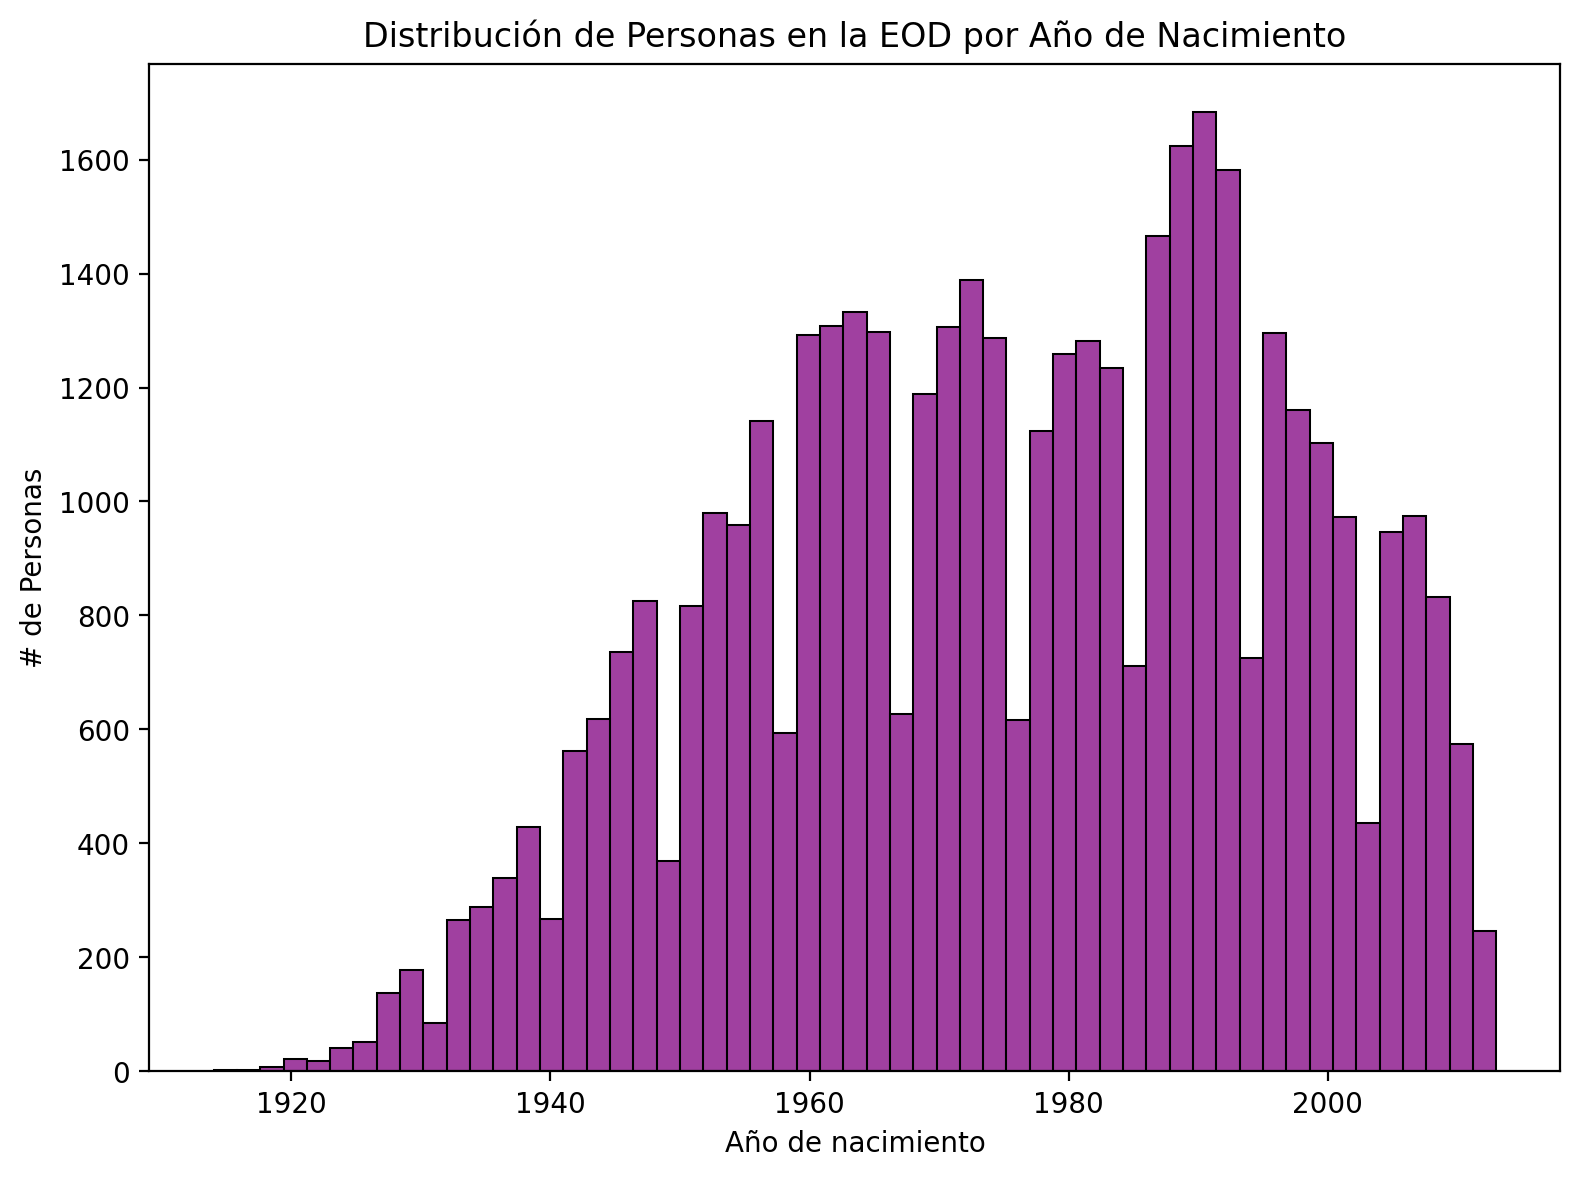

In [60]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=viajes_persona_hogar_unique, x="AnoNac", ax=ax, color='purple')

ax.set_xlabel("Año de nacimiento")
ax.set_ylabel("# de Personas")
ax.set_title("Distribución de Personas en la EOD por Año de Nacimiento")

fig.tight_layout()

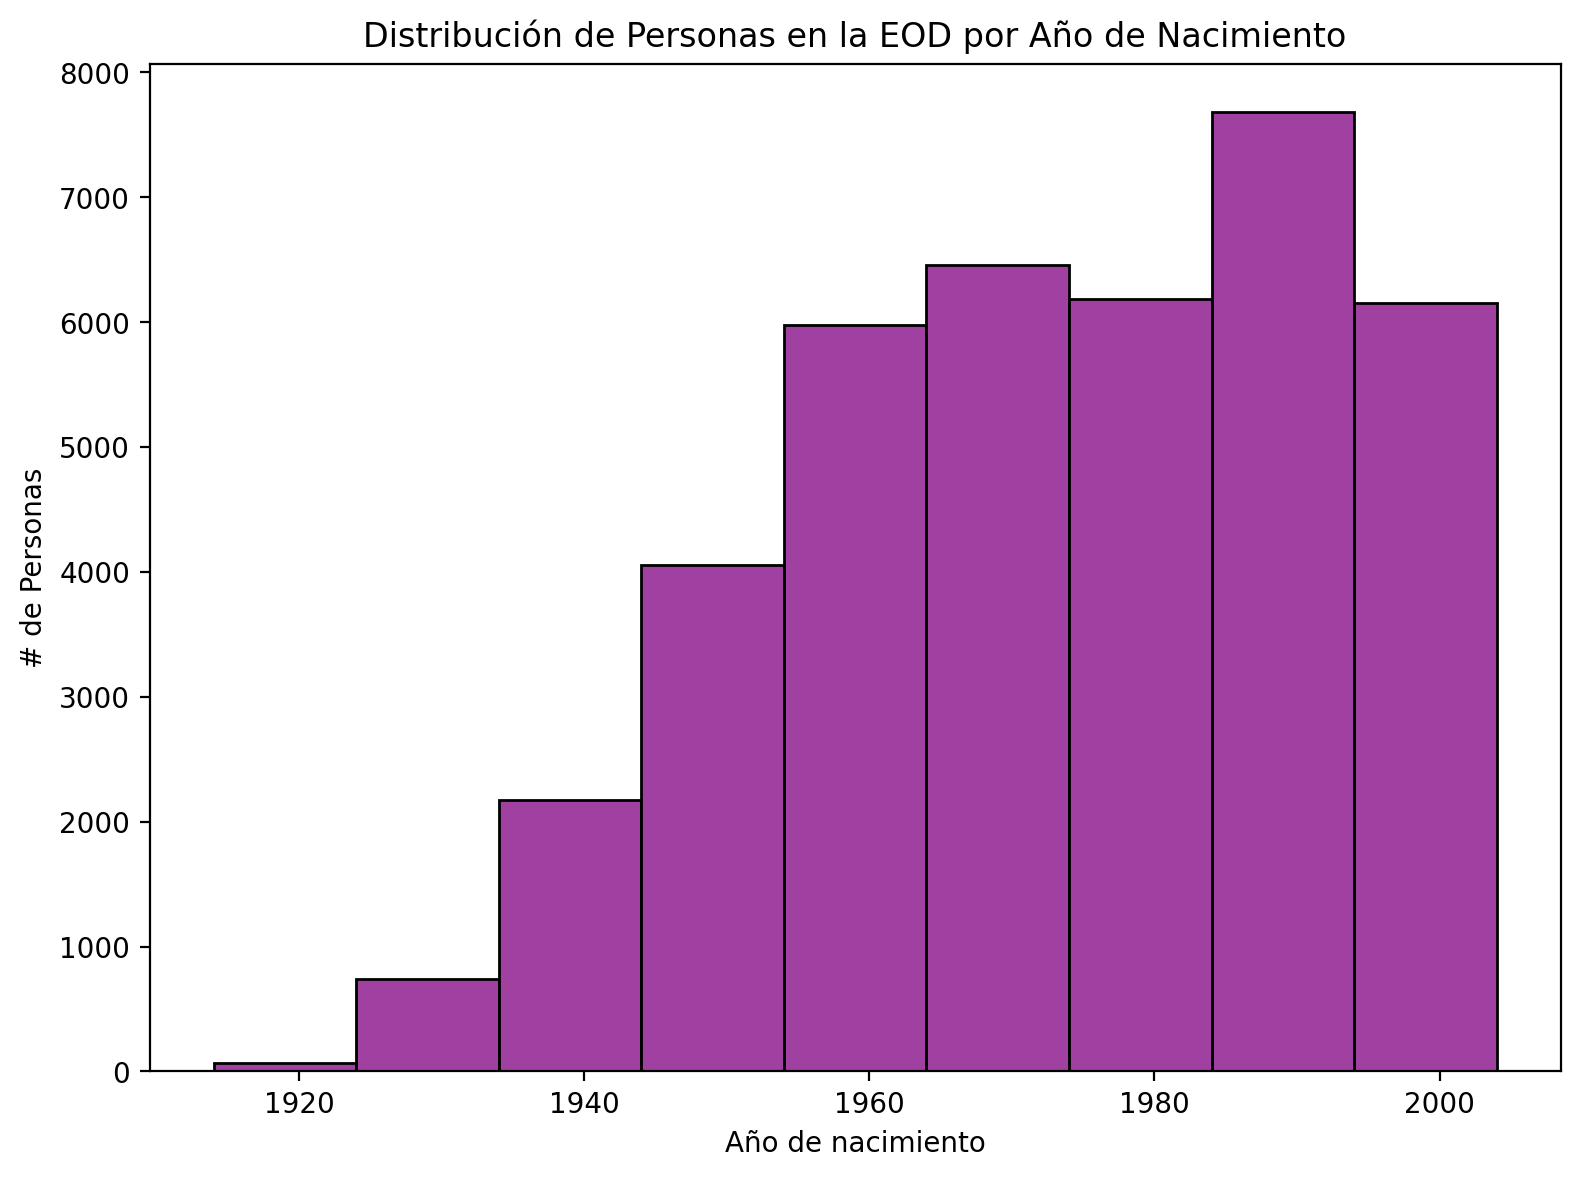

In [61]:

fig, ax = plt.subplots(figsize=(8, 6))

# Calcular los límites de los bins de 10 años
min_year = viajes_persona_hogar_unique['AnoNac'].min()
max_year = viajes_persona_hogar_unique['AnoNac'].max()
bins = range(min_year, max_year, 10)  # Ajustar el paso a 10

sns.histplot(data=viajes_persona_hogar_unique, x="AnoNac", ax=ax, color='purple', bins=bins)

ax.set_xlabel("Año de nacimiento")
ax.set_ylabel("# de Personas")
ax.set_title("Distribución de Personas en la EOD por Año de Nacimiento")

fig.tight_layout()
plt.show()
